# 전체 라이브러리 설치 한번에

In [ ]:
pip install fake-useragent aiohttp requests beautifulsoup4 pandas tqdm numpy matplotlib seaborn plotly scikit-learn tensorflow koreanize-matplotlib konlpy wheel JPype1

# 데이터 수집 | 커뮤니티, 차트, 온체인

커뮤니티 ->  
실행 파일 : ./python/4crawling.ipynb, altCrawl.ipynb, chart_DC_crawler.ipynb  
수집 대상 : 디시인사이드 차트 갤러리, 알트 갤러리, 전자화폐 갤러리  

차트 ->  
실행 파일 : ./python/TrvChart.ipynb  
수집 대상 : 비트코인, 이더리움, 솔라나, 나스닥, 금, 글로벌 유동성 지수(미국, 중국)  
(트레이딩 뷰에서 확인 가능하고 높은 유동성의 거래소 중심)

온체인 ->  
실행 파일 : 없음  

이더스캔 같은 경우 CloudFalre 정책 문제로 동적 크롤링이 어려워 마우스 매크로 다운받아서 직접 수집  
테더(USDT)의 ERC-20 네트워크 상에서의 컨트랙트 주소  
수집 대상 : 
https://etherscan.io/advanced-filter?tkn=0xdac17f958d2ee523a2206206994597c13d831ec7&txntype=2&amt=16000000~999999999&age=2020-01-01~2025-04-30&ps=100

비트코인의 거래소 볼륨은 사이트 내 자체 다운로드 기능을 활용  
수집 대상 : https://www.blockchain.com/explorer/charts/trade-volume

# 데이터 수집 | 커뮤니티, 차트, 온체인

커뮤니티 ->  
실행 파일 : ./python/4crawling.ipynb, altCrawl.ipynb, chart_DC_crawler.ipynb  
수집 대상 : 디시인사이드 차트 갤러리, 알트 갤러리, 전자화폐 갤러리  

차트 ->  
실행 파일 : ./python/TrvChart.ipynb  
수집 대상 : 비트코인, 이더리움, 솔라나, 나스닥, 금, 글로벌 유동성 지수(미국, 중국)  
(트레이딩 뷰에서 확인 가능하고 높은 유동성의 거래소 중심)

온체인 ->  
실행 파일 : 없음  

이더스캔 같은 경우 CloudFalre 정책 문제로 동적 크롤링이 어려워 마우스 매크로 다운받아서 직접 수집  
테더(USDT)의 ERC-20 네트워크 상에서의 컨트랙트 주소  
수집 대상 : 
https://etherscan.io/advanced-filter?tkn=0xdac17f958d2ee523a2206206994597c13d831ec7&txntype=2&amt=16000000~999999999&age=2020-01-01~2025-04-30&ps=100

비트코인의 거래소 볼륨은 사이트 내 자체 다운로드 기능을 활용  
수집 대상 : https://www.blockchain.com/explorer/charts/trade-volume

# 모텔링 분석 | 커뮤니티

In [ ]:
# DataAnlySis.ipynb 파일로 분리하였습니다

# 모텔링 분석 | 차트

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 한글 폰트 설정 (환경에 맞게 글꼴명 또는 경로를 수정)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

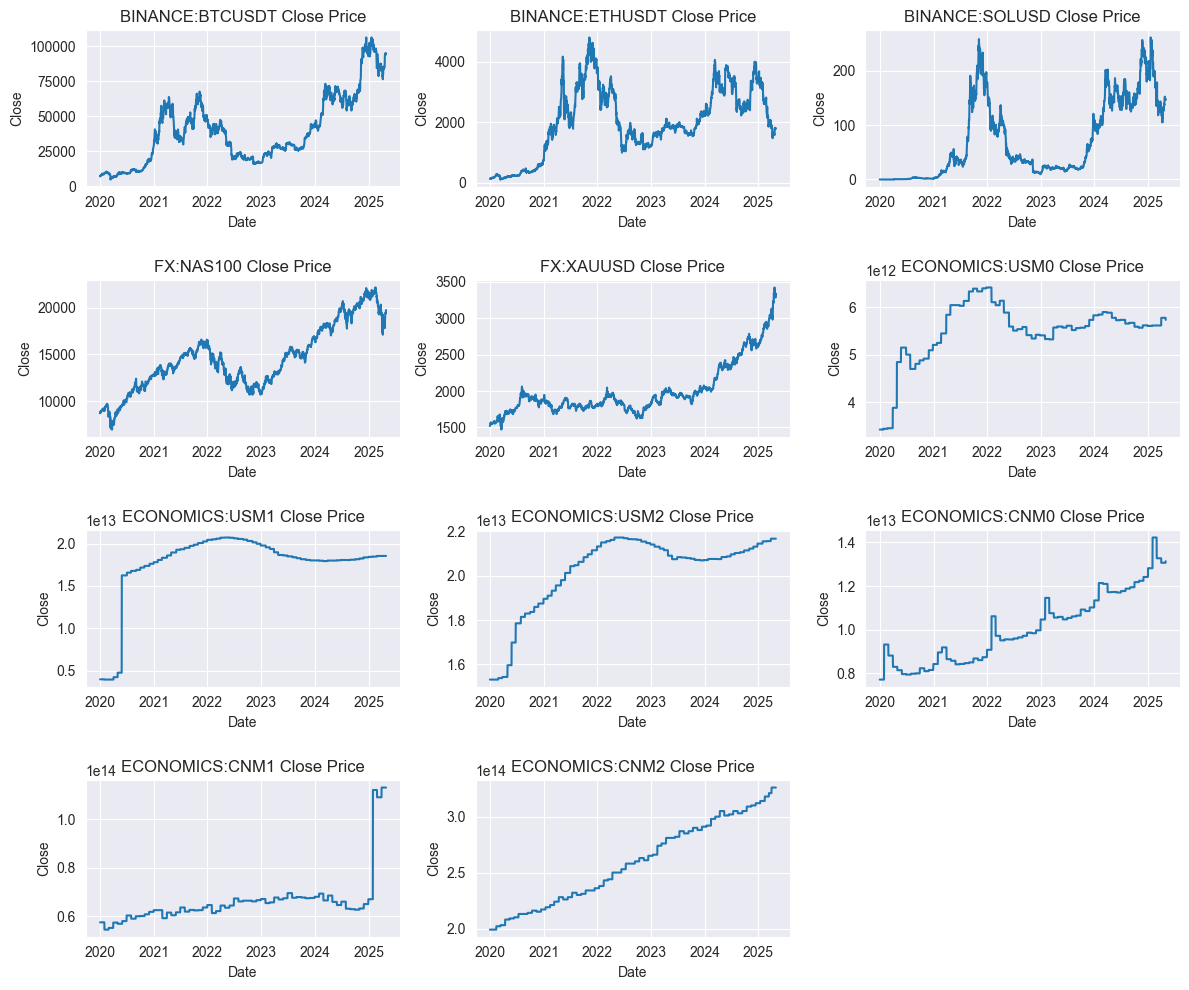

=== Weekly Correlation Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Correlation
BINANCE:BTCUSDT BINANCE:ETHUSDT     0.774034
BINANCE:ETHUSDT  BINANCE:SOLUSD     0.603243
BINANCE:BTCUSDT  BINANCE:SOLUSD     0.519148
BINANCE:ETHUSDT       FX:NAS100     0.362967
BINANCE:BTCUSDT       FX:NAS100     0.296511
 BINANCE:SOLUSD       FX:NAS100     0.209996
      FX:NAS100       FX:XAUUSD     0.178270
BINANCE:ETHUSDT  ECONOMICS:USM2     0.104979
BINANCE:BTCUSDT  ECONOMICS:USM0     0.102109
BINANCE:BTCUSDT       FX:XAUUSD     0.094576

=== Monthly Correlation Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Correlation
BINANCE:BTCUSDT BINANCE:ETHUSDT     0.748650
BINANCE:ETHUSDT       FX:NAS100     0.634017
BINANCE:ETHUSDT  BINANCE:SOLUSD     0.611708
BINANCE:BTCUSDT       FX:NAS100     0.511571
BINANCE:BTCUSDT  BINANCE:SOLUSD     0.448414
      FX:NAS100  ECONOMICS:USM0     0.405664
 BINANCE:SOLUSD       FX:NAS100     0.384384
BINANCE:ETHUSDT  ECONOMICS:USM0     0.375856
BINA

C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\4137886385.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = close_df.resample('M').last().pct_change().dropna()


In [ ]:
# Step 1: 라이브러리 임포트 및 심볼 정의
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

symbols = [
    "BINANCE:BTCUSDT", "BINANCE:ETHUSDT", "BINANCE:SOLUSD",
    "FX:NAS100", "FX:XAUUSD",
    "ECONOMICS:USM0", "ECONOMICS:USM1", "ECONOMICS:USM2",
    "ECONOMICS:CNM0", "ECONOMICS:CNM1", "ECONOMICS:CNM2"
]
data = {}

# --- CSV 파일 로드 (data 채우기) ---
for sym in symbols:
    filepath = f"./chart/{sym.replace(':', '_')}_daily_UTC.csv"
    if not os.path.exists(filepath):
        continue

    df = pd.read_csv(filepath, parse_dates=['date'])
    df = df.drop_duplicates(subset='date').sort_values('date').set_index('date')
    data[sym] = df

# 여기서 available_symbols 정의
available_symbols = list(data.keys())

# === 수정된 Step 2: 하나의 Figure에 여러 Subplot으로 그리기 ===
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, sym in enumerate(available_symbols):
    df = data[sym]
    sns.lineplot(x=df.index, y=df['close'], ax=axes[i])
    axes[i].set_title(f"{sym} Close Price")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Close")

for j in range(len(available_symbols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Step 3: 종가만 모아서 하나의 DataFrame으로 결합
# 파일이 로드된 심볼들만 사용
available_symbols = list(data.keys())
close_df = pd.DataFrame({sym: data[sym]['close'] for sym in available_symbols})

# Step 4: 주간 및 월간 수익률 계산
weekly_returns = close_df.resample('W').last().pct_change().dropna()
monthly_returns = close_df.resample('M').last().pct_change().dropna()

# Step 5: 상관계수 행렬 계산
weekly_corr = weekly_returns.corr()
monthly_corr = monthly_returns.corr()

# Step 6: 상관계수 행렬을 쌍별로 펼쳐서 랭킹 생성
def flatten_corr(corr_df):
    pairs = []
    syms = corr_df.columns.tolist()
    for i in range(len(syms)):
        for j in range(i+1, len(syms)):
            pairs.append({
                'Symbol 1': syms[i],
                'Symbol 2': syms[j],
                'Correlation': corr_df.iloc[i, j]
            })
    return pd.DataFrame(pairs)

weekly_pairs = flatten_corr(weekly_corr).sort_values('Correlation', ascending=False)
monthly_pairs = flatten_corr(monthly_corr).sort_values('Correlation', ascending=False)

# Step 7: USM끼리, CNM끼리는 제외
def exclude_same_group(df):
    mask_usm = df['Symbol 1'].str.startswith("ECONOMICS:USM") & df['Symbol 2'].str.startswith("ECONOMICS:USM")
    mask_cnm = df['Symbol 1'].str.startswith("ECONOMICS:CNM") & df['Symbol 2'].str.startswith("ECONOMICS:CNM")
    return df[~(mask_usm | mask_cnm)]

weekly_pairs = exclude_same_group(weekly_pairs).sort_values('Correlation', ascending=False)
monthly_pairs = exclude_same_group(monthly_pairs).sort_values('Correlation', ascending=False)

# Step 8: 결과 출력 (상위 10개만 예시로 출력)
print("=== Weekly Correlation Top 10 (USM·CNM 제외) ===")
print(weekly_pairs.head(10).to_string(index=False))
print("\n=== Monthly Correlation Top 10 (USM·CNM 제외) ===")
print(monthly_pairs.head(10).to_string(index=False))

# 필요하면 CSV로 저장
# weekly_pairs.to_csv("weekly_correlation_rankings.csv", index=False)
# monthly_pairs.to_csv("monthly_correlation_rankings.csv", index=False)


=== Weekly Top 10 Correlations (USM·CNM 제외) ===
BTCUSDT ↔ ETHUSDT: 0.7740
ETHUSDT ↔ SOLUSD: 0.6032
BTCUSDT ↔ SOLUSD: 0.5191
ETHUSDT ↔ NAS100: 0.3630
BTCUSDT ↔ NAS100: 0.2965
SOLUSD ↔ NAS100: 0.2100
NAS100 ↔ XAUUSD: 0.1783
ETHUSDT ↔ USM2: 0.1050
BTCUSDT ↔ USM0: 0.1021
BTCUSDT ↔ XAUUSD: 0.0946

=== Monthly Top 10 Correlations (USM·CNM 제외) ===
BTCUSDT ↔ ETHUSDT: 0.7486
ETHUSDT ↔ NAS100: 0.6340
ETHUSDT ↔ SOLUSD: 0.6117
BTCUSDT ↔ NAS100: 0.5116
BTCUSDT ↔ SOLUSD: 0.4484
NAS100 ↔ USM0: 0.4057
SOLUSD ↔ NAS100: 0.3844
ETHUSDT ↔ USM0: 0.3759
BTCUSDT ↔ USM0: 0.3510
SOLUSD ↔ USM0: 0.2490


C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:29: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:29: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  fig.canvas.print_figure(b

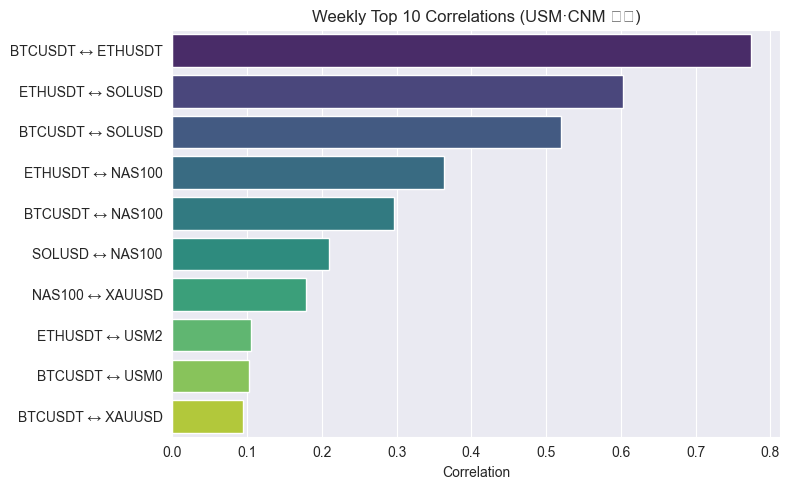

C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:43: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:43: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  fig.canvas.print_figure(b

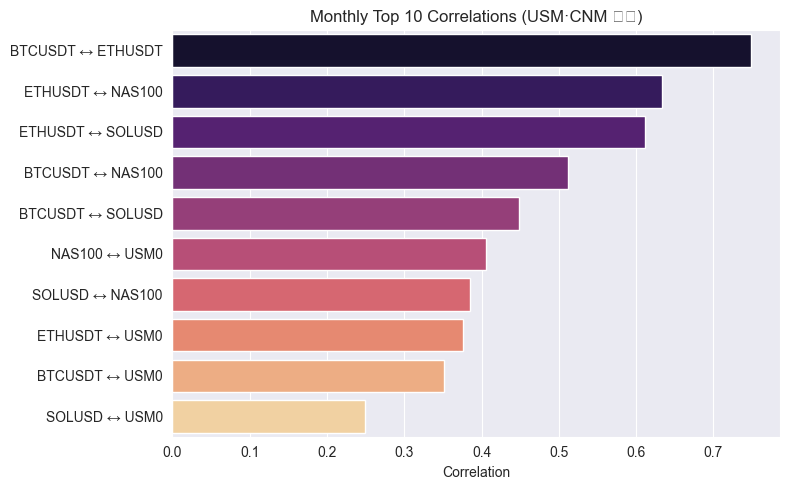

In [ ]:
# --- 1) 상위 10개 데이터 추출 ---
top_w = weekly_pairs.head(10).copy()
top_m = monthly_pairs.head(10).copy()

# 막대그래프용으로 “Symbol 1 vs Symbol 2” 문자열 컬럼 추가
top_w['Pair'] = top_w['Symbol 1'].str.split(':').str[-1] + " ↔ " + top_w['Symbol 2'].str.split(':').str[-1]
top_m['Pair'] = top_m['Symbol 1'].str.split(':').str[-1] + " ↔ " + top_m['Symbol 2'].str.split(':').str[-1]

# --- 1.5) 글자로도 결과 출력 ---
print("=== Weekly Top 10 Correlations (USM·CNM 제외) ===")
for _, row in top_w.iterrows():
    print(f"{row['Pair']}: {row['Correlation']:.4f}")

print("\n=== Monthly Top 10 Correlations (USM·CNM 제외) ===")
for _, row in top_m.iterrows():
    print(f"{row['Pair']}: {row['Correlation']:.4f}")

# --- 2) Weekly 상위 10 막대그래프 ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_w,
    x='Correlation',
    y='Pair',
    palette='viridis'
)
plt.title("Weekly Top 10 Correlations (USM·CNM 제외)")
plt.xlabel("Correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- 3) Monthly 상위 10 막대그래프 ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_m,
    x='Correlation',
    y='Pair',
    palette='magma'
)
plt.title("Monthly Top 10 Correlations (USM·CNM 제외)")
plt.xlabel("Correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()


# 모텔링 분석 | 온체인

In [ ]:
# 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models, optimizers, callbacks
from datetime import datetime, timedelta

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

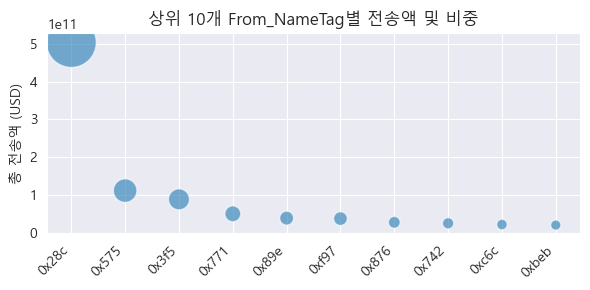

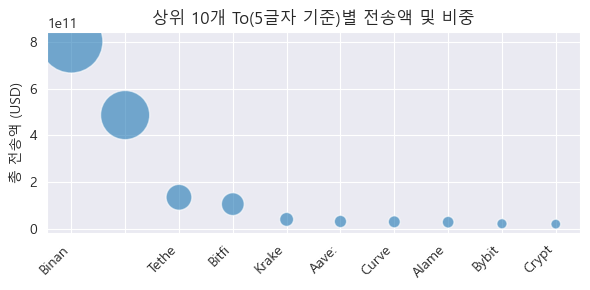

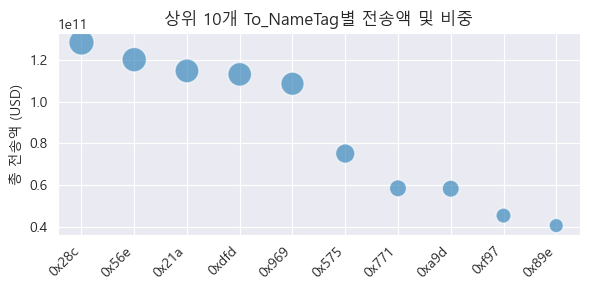

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

file_path = './onchain/usdt_onchain.csv'

# 1) CSV 읽기 (gzip / utf-8 시도 → 실패 시 latin1)
try:
    df = pd.read_csv(file_path, compression='gzip', encoding='utf-8')
except (OSError, UnicodeDecodeError):
    df = pd.read_csv(file_path, encoding='latin1')

# 2) 컬럼명 앞뒤 공백 제거
df.columns = df.columns.str.strip()

# 3) ValueUSD 전처리: "$","," 제거 후 숫자형으로 변환
df['ValueUSD'] = (
    df['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
)

# 4) Date 컬럼을 datetime 형으로 변환
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 5) 필요한 컬럼만 추출
df = df[['Date', 'From_NameTag', 'To', 'To_NameTag', 'Amount', 'ValueUSD']].dropna(subset=['Date', 'ValueUSD'])

# 함수: 지정된 컬럼별 상위 10개 버블맵 그리기
def plot_bubble(df, group_col, title):
    grouped = (
        df.groupby(group_col)
          .agg(total_value=('ValueUSD', 'sum'))
          .reset_index()
    )
    grouped['proportion'] = grouped['total_value'] / grouped['total_value'].sum()
    top10 = grouped.sort_values('total_value', ascending=False).head(10).reset_index(drop=True)
    top10['short_name'] = top10[group_col].astype(str).str.slice(0, 5)

    plt.figure(figsize=(6, 3))
    x = range(len(top10))
    y = top10['total_value']
    sizes = top10['proportion'] * 5000

    plt.scatter(x, y, s=sizes, alpha=0.6, edgecolors='w')
    plt.xticks(x, top10['short_name'], rotation=45, ha='right')
    plt.ylabel('총 전송액 (USD)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 6) From_NameTag 기준 버블맵
plot_bubble(df, 'From_NameTag', '상위 10개 From_NameTag별 전송액 및 비중')

# 7) To 기준 버블맵
df['To_prefix5'] = df['To'].str.slice(0, 5)
plot_bubble(df, 'To_prefix5', '상위 10개 To(5글자 기준)별 전송액 및 비중')

# 8) To_NameTag 기준 버블맵
plot_bubble(df, 'To_NameTag', '상위 10개 To_NameTag별 전송액 및 비중')


In [ ]:
# --- 2) 일별 집계 생성 ---
# (가정: df에 'Date' 컬럼이 datetime, 'ValueUSD'가 숫자형으로 들어 있음)

# 2-1) Date가 문자열인 경우 datetime 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2-2) 일별 합계(sum)와 건수(count) 집계
daily_agg = (
    df
    .groupby(df['Date'].dt.date)  # 날짜만 뽑아서 그룹화
    .agg(
        daily_sum=('ValueUSD', 'sum'),
        daily_count=('ValueUSD', 'count')
    )
    .reset_index()
    .rename(columns={'Date': 'Date'})  # 컬럼명 그대로
)

                                Date      ValueUSD
count                          46375  4.637500e+04
mean   2023-03-11 13:53:45.367115776  4.197627e+07
min              2020-01-03 00:00:00  1.600000e+07
25%              2021-10-28 00:00:00  2.000000e+07
50%              2023-03-16 00:00:00  2.685388e+07
75%              2024-09-02 00:00:00  4.626160e+07
max              2025-04-30 00:00:00  9.999999e+08
std                              NaN  5.165610e+07


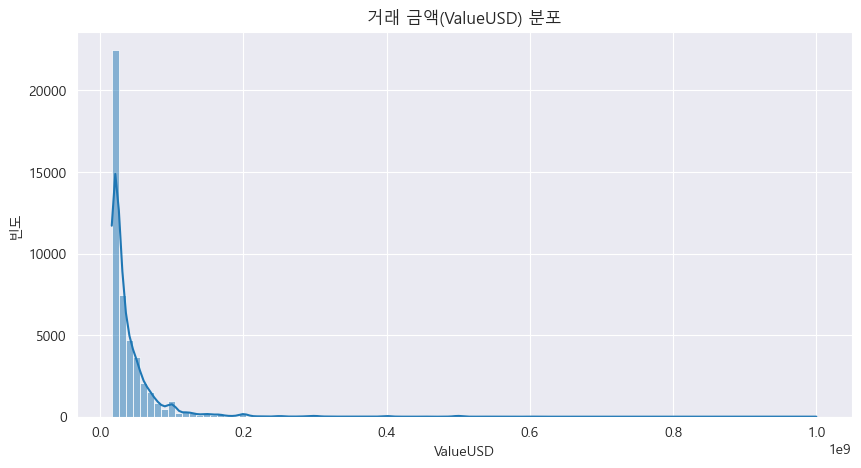

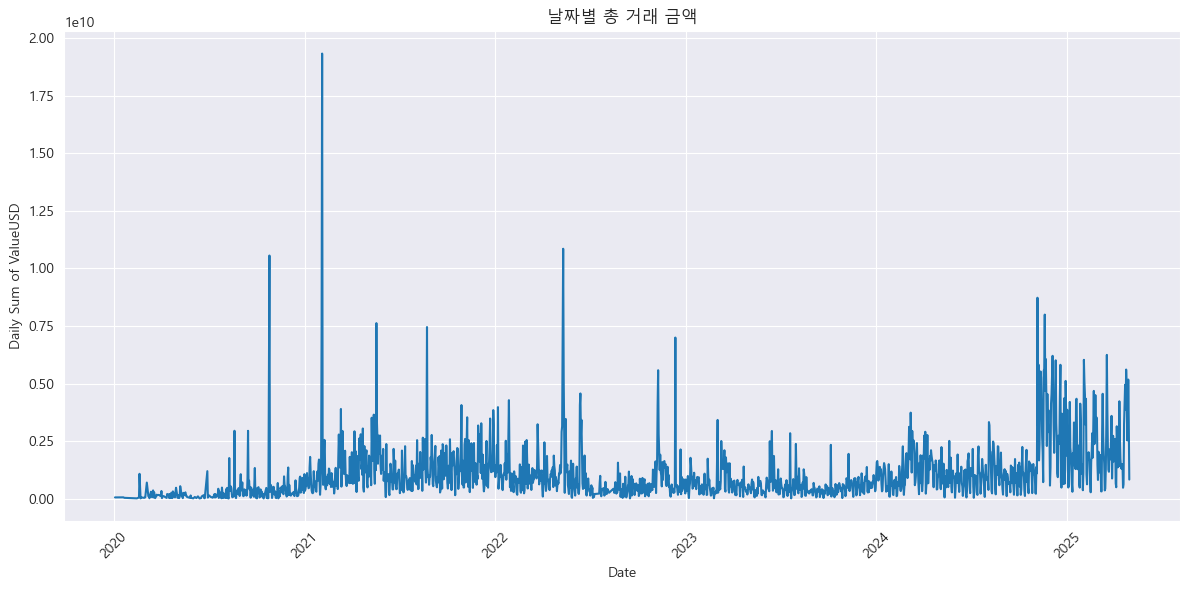

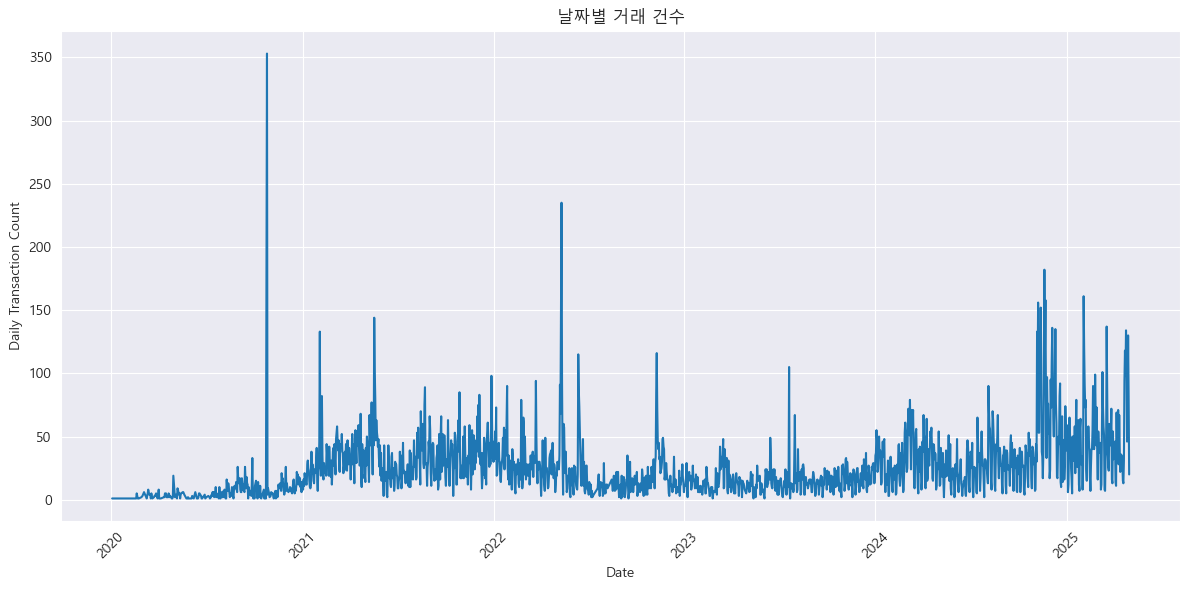

In [ ]:
# 3) 탐색적 데이터 분석(EDA): 기초 통계 및 시각화

# 3-1) 기초 통계 출력
print(df.describe())

# 3-2) 거래 금액(ValueUSD) 분포 히스토그램 (seaborn 사용)
plt.figure(figsize=(10, 5))
sns.histplot(df['ValueUSD'].dropna(), bins=100, kde=True)
plt.title('거래 금액(ValueUSD) 분포')
plt.xlabel('ValueUSD')
plt.ylabel('빈도')
plt.show()

# 3-4) 날짜별 총 거래 금액 시각화 (seaborn 사용)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_agg, x='Date', y='daily_sum')
plt.title('날짜별 총 거래 금액')
plt.xlabel('Date')
plt.ylabel('Daily Sum of ValueUSD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3-5) 날짜별 거래 건수 시각화 (seaborn 사용)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_agg, x='Date', y='daily_count')
plt.title('날짜별 거래 건수')
plt.xlabel('Date')
plt.ylabel('Daily Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 실험 분석 | 커뮤니티와 차트 분석

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ============================
# 설정: 파일 경로 지정
# ============================
WORD_FILE  = './community/monthly_word_alt.csv'               # 예: 'monthly_word_alt.csv'
# WORD_FILE  = './community/monthly_word_Chart.csv'               # 예: 'monthly_word_alt.csv'
# WORD_FILE  = './community/monthly_word_electronicmoney.csv'               # 예: 'monthly_word_alt.csv'
CHART_FILE = './chart/BINANCE_BTCUSDT_daily_UTC.csv'

# ============================
# 1) 월별 단어 빈도 데이터 로드
# ============================
# 파일이 “콤마(,) 구분된 CSV”이므로 sep=',' 사용
df_words = pd.read_csv(
    WORD_FILE,
    sep=',',
    encoding='utf-8-sig'
)
# 컬럼: ['month', 'count', 'rankw', 'word', 'frequency']
print("읽은 df_words 컬럼명:", df_words.columns.tolist())

# ============================
# 2) df_chart(일별 BTCUSDT 차트) 데이터 로드
# ============================
df_chart = pd.read_csv(
    CHART_FILE,
    parse_dates=['date']
)

# ============================
# 3) 데이터 전처리: 'year_month' 생성 & 월별 등락률 계산
# ============================
# 3-1) df_words: 'month' 열이 이미 'YYYY-MM' 형식이므로 바로 활용
df_words['year_month'] = df_words['month']  # 예: "2020-01", "2020-02", …

# 3-2) df_chart: 'date' → 'year_month'(period) → 시가/종가 집계 → 등락률 계산
df_chart['year_month'] = df_chart['date'].dt.to_period('M')
monthly_prices = (
    df_chart
    .groupby('year_month')['close']
    .agg(first='first', last='last')
    .reset_index()
)
monthly_prices['pct_change'] = (
    monthly_prices['last'] - monthly_prices['first']
) / monthly_prices['first']
monthly_prices['year_month'] = monthly_prices['year_month'].dt.strftime('%Y-%m')

# 3-3) 등락률 기준으로 카테고리 분류: down(≤-10%), neutral(–10%~+10%), up(≥+10%)
monthly_prices['category'] = pd.cut(
    monthly_prices['pct_change'],
    bins=[-np.inf, -0.10, 0.10, np.inf],
    labels=['down', 'neutral', 'up']
)

print("\n월별 등락률 예시:")
print(monthly_prices[['year_month','first','last','pct_change','category']].head())

# ============================
# 4) 병합 및 상위 단어 추출
# ============================
df_merged = pd.merge(
    df_words,
    monthly_prices[['year_month','category','pct_change']],
    on='year_month',
    how='inner'
)

# 4-1) 카테고리별 단어 빈도 합계 → 상위 5개
category_word_freq = (
    df_merged
    .groupby(['category','word'])['frequency']
    .sum()
    .reset_index()
)
top_words_by_category = (
    category_word_freq
    .sort_values(['category','frequency'], ascending=[True, False])
    .groupby('category')
    .head(5)
    .reset_index(drop=True)
)

print("\n=== 카테고리별 상위 5개 단어 (빈도 합계 기준) ===")
print(top_words_by_category.to_string(index=False))

# ============================
# 5) 단어 빈도와 등락률 상관계수 계산
# ============================
pivot_words = df_merged.pivot_table(
    index='year_month',
    columns='word',
    values='frequency',
    aggfunc='sum',
    fill_value=0
).reset_index()

corr_df = pd.merge(
    pivot_words,
    monthly_prices[['year_month','pct_change']],
    on='year_month',
    how='inner'
)

word_columns = corr_df.columns.drop(['year_month','pct_change'])
corr_series = corr_df[word_columns].corrwith(corr_df['pct_change']).sort_values(ascending=False)

top_positive_corr = corr_series.head(5).reset_index()
top_positive_corr.columns = ['단어','상관계수']
top_negative_corr = corr_series.tail(5).reset_index()
top_negative_corr.columns = ['단어','상관계수']

print("\n=== pct_change와 양(+) 상관 상위 5개 단어 ===")
print(top_positive_corr.round(4).to_string(index=False))

print("\n=== pct_change와 음(-) 상관 상위 5개 단어 ===")
print(top_negative_corr.round(4).to_string(index=False))

# ============================
# 6) CNN 모델 학습을 위한 데이터 준비
# ============================
X = corr_df[word_columns].values                   # (월 수, 단어 수)
X = X.reshape((X.shape[0], X.shape[1], 1))          # Conv1D 입력 형태: (samples, timesteps, channels)

le = LabelEncoder()
y = le.fit_transform(monthly_prices['category'])   # down→0, neutral→1, up→2

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================
# 7) 1D CNN 모델 정의 및 학습
# ============================
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print("\n=== CNN 모델 학습 시작 ===")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.1,
    callbacks=[es],
    verbose=2
)

# ============================
# 8) 모델 평가 및 결과 출력
# ============================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n=== 테스트 세트 평가 ===\nLoss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# ============================
# 9) 모델링 기법 설명까지 일단 해주기
# ============================
print("\n=== 모델링 기법 설명 ===")
print(
    "이 스크립트에서는 '월별 단어 빈도 벡터'를 1차원 시계열처럼 보고,\n"
    "Conv1D(1D Convolutional Neural Network) 레이어를 통해 특징을 추출한 뒤\n"
    "GlobalMaxPooling1D → Dense → Softmax 구조로 'down', 'neutral', 'up' 세 클래스를 예측합니다.\n"
    "즉, 단어 빈도 패턴을 CNN이 학습하여 BTC 월별 등락 카테고리를 분류하는 모델링 방식입니다."
)

읽은 df_words 컬럼명: ['month', 'count', 'rank', 'word', 'frequency']

월별 등락률 예시:
  year_month    first     last  pct_change category
0    2020-01  9352.89  7200.85   -0.230094     down
1    2020-02  8523.61  9384.61    0.101014       up
2    2020-03  6410.44  8531.88    0.330935       up
3    2020-04  8620.00  6642.92   -0.229360     down
4    2020-05  9448.27  8826.96   -0.065759  neutral

=== 카테고리별 상위 5개 단어 (빈도 합계 기준) ===
category word  frequency
    down   코인       2519
    down   비트       2168
    down   버그       1264
    down   사람       1221
    down   따리        787
 neutral   코인       1411
 neutral   비트       1168
 neutral   사람        783
 neutral   정신        705
 neutral   존귀        438
      up   코인       1487
      up   비트       1292
      up  하나님       1211
      up   사람        855
      up   정신        513

=== pct_change와 양(+) 상관 상위 5개 단어 ===
 단어   상관계수
 팬티 0.4058
 누나 0.3510
 승현 0.3510
 치기 0.3510
박치기 0.3510

=== pct_change와 음(-) 상관 상위 5개 단어 ===
  단어    상관계수
  알트 -0.2647
  리퍼 -0.

C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\3799929507.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['category','word'])['frequency']
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\3799929507.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('category')
c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activ

6/6 - 1s - 225ms/step - accuracy: 0.4000 - loss: 10.0167 - val_accuracy: 0.5000 - val_loss: 10.3342
Epoch 2/20
6/6 - 0s - 19ms/step - accuracy: 0.3333 - loss: 6.7257 - val_accuracy: 0.3333 - val_loss: 6.9411
Epoch 3/20
6/6 - 0s - 18ms/step - accuracy: 0.4444 - loss: 4.0663 - val_accuracy: 0.1667 - val_loss: 3.9517
Epoch 4/20
6/6 - 0s - 21ms/step - accuracy: 0.4000 - loss: 1.3402 - val_accuracy: 0.3333 - val_loss: 2.0141
Epoch 5/20
6/6 - 0s - 19ms/step - accuracy: 0.2889 - loss: 1.7012 - val_accuracy: 0.3333 - val_loss: 0.9778
Epoch 6/20
6/6 - 0s - 19ms/step - accuracy: 0.3556 - loss: 1.4267 - val_accuracy: 0.1667 - val_loss: 1.3469
Epoch 7/20
6/6 - 0s - 19ms/step - accuracy: 0.4000 - loss: 1.2631 - val_accuracy: 0.1667 - val_loss: 2.3436
Epoch 8/20
6/6 - 0s - 20ms/step - accuracy: 0.3778 - loss: 1.2282 - val_accuracy: 0.5000 - val_loss: 1.1248

=== 테스트 세트 평가 ===
Loss: 1.8683, Accuracy: 0.3077

=== 모델링 기법 설명 ===
이 스크립트에서는 '월별 단어 빈도 벡터'를 1차원 시계열처럼 보고,
Conv1D(1D Convolutional Neural Netwo

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ============================
# 1) 파일 경로 지정
# ============================
# WORD_FILE  = './community/monthly_word_alt.csv'
CHART_FILE = './chart/BINANCE_BTCUSDT_daily_UTC.csv'

# ============================
# 2) 월별 단어 빈도 데이터 로드
# ============================
df_words = pd.read_csv(
    WORD_FILE,
    sep=',',
    encoding='utf-8-sig'
)
# 컬럼: ['month','count','rankw','word','frequency']
# 'month'는 'YYYY-MM' 형식이라고 가정

# ============================
# 3) BTC 차트 데이터 로드 → 월별 등락률 계산
# ============================
df_chart = pd.read_csv(CHART_FILE, parse_dates=['date'])
df_chart['year_month'] = df_chart['date'].dt.to_period('M')

monthly_prices = (
    df_chart
    .groupby('year_month')['close']
    .agg(first='first', last='last')
    .reset_index()
)
monthly_prices['pct_change'] = (
    monthly_prices['last'] - monthly_prices['first']
) / monthly_prices['first']
monthly_prices['year_month'] = monthly_prices['year_month'].dt.strftime('%Y-%m')
monthly_prices['category'] = pd.cut(
    monthly_prices['pct_change'],
    bins=[-np.inf, -0.10, 0.10, np.inf],
    labels=['down', 'neutral', 'up']
)

# ============================
# 4) 월별 상위 10개 단어 추출
# ============================
df_words['year_month'] = df_words['month']
top10_per_month = (
    df_words
    .sort_values(['month','frequency'], ascending=[True, False])
    .groupby('month')
    .head(10)
    .reset_index(drop=True)
)
months_sorted = sorted(df_words['month'].unique())

# ============================
# 5) CNN 입력 데이터 준비 (월별 상위 10개 단어 빈도)
# ============================
X_list = []
for m in months_sorted:
    subset = top10_per_month[top10_per_month['month'] == m]
    freqs = subset['frequency'].tolist()
    if len(freqs) < 10:
        freqs += [0] * (10 - len(freqs))
    X_list.append(freqs)
X_arr = np.array(X_list, dtype=float)
X = X_arr.reshape((X_arr.shape[0], X_arr.shape[1], 1))

# y: 카테고리 인코딩
le = LabelEncoder()
y = le.fit_transform(monthly_prices.set_index('year_month').loc[months_sorted, 'category'].values)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# 6) 1D CNN 모델 정의 및 학습
# ============================
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10,1)),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.1,
    callbacks=[es],
    verbose=2
)

# ============================
# 7) 모델 평가 및 예측
# ============================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"==== 테스트 세트 평가: Loss={loss:.4f}, Accuracy={accuracy:.4f} ====\n")

probabilities = model.predict(X, verbose=0)
up_prob = probabilities[:, 2]  # “up” 클래스 확률
pred_classes = np.argmax(probabilities, axis=1)
predicted_labels = le.inverse_transform(pred_classes)

# ============================
# 8) 결과 정리
# ============================
results_df = pd.DataFrame({
    'month':             months_sorted,
    'actual_category':   monthly_prices.set_index('year_month').loc[months_sorted, 'category'].values,
    'predicted_category': predicted_labels,
    'up_probability':    up_prob.round(4),
    'pct_change':        monthly_prices.set_index('year_month').loc[months_sorted, 'pct_change'].values
})

# ============================
# 9) 연도·월 분리
# ============================
results_df[['year', 'month_num']] = results_df['month'].str.split('-', expand=True)
results_df['year'] = results_df['year'].astype(int)
results_df['month_num'] = results_df['month_num'].astype(int)

# ============================
# 10) 가로형 피벗: 각 필드를 연도별 1~12월 컬럼으로
# ============================

# ============================
# 10-1) actual_price 피벗: 월별 종가(‘last’) 기준으로
# ============================
# 10-1-a) monthly_prices에서 'year', 'month_num', 'last' 컬럼 준비
monthly_prices[['year', 'month_num']] = monthly_prices['year_month'].str.split('-', expand=True)
monthly_prices['year'] = monthly_prices['year'].astype(int)
monthly_prices['month_num'] = monthly_prices['month_num'].astype(int)

# 10-1-b) 피벗 생성: index=year, columns=month_num, values=last (월말 종가)
pivot_actual = (
    monthly_prices
    .pivot(index='year', columns='month_num', values='last')
)
pivot_actual.columns = [f"{m:02d}" for m in pivot_actual.columns]
pivot_actual = pivot_actual.reindex(columns=[f"{m:02d}" for m in range(1, 13)])

# 10-2) predicted_category 피벗
pivot_pred = (
    results_df
    .pivot(index='year', columns='month_num', values='predicted_category')
)
pivot_pred.columns = [f"{m:02d}" for m in pivot_pred.columns]
pivot_pred = pivot_pred.reindex(columns=[f"{m:02d}" for m in range(1, 13)])

# 10-3) up_probability 피벗
pivot_prob = (
    results_df
    .pivot(index='year', columns='month_num', values='up_probability')
)
pivot_prob.columns = [f"{m:02d}" for m in pivot_prob.columns]
pivot_prob = pivot_prob.reindex(columns=[f"{m:02d}" for m in range(1, 13)])

# ============================
# 11) CSV로 저장
# ============================
# pivot_actual.to_csv('.result/actual_category_by_year.csv', encoding='utf-8-sig')
# pivot_pred.to_csv('.result/predicted_category_by_year.csv', encoding='utf-8-sig')
# pivot_prob.to_csv('.result/up_probability_by_year.csv', encoding='utf-8-sig')

# ============================
# 12) 출력 확인
# ============================
print("==== 연도별 월별 실제 카테고리 ====")
print(pivot_actual)
print("\n==== 연도별 월별 예측 카테고리 ====")
print(pivot_pred)
print("\n==== 연도별 월별 up_probability ====")
print(pivot_prob)

Epoch 1/20


c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 1s - 217ms/step - accuracy: 0.4000 - loss: 4.0916 - val_accuracy: 0.5000 - val_loss: 1.8567
Epoch 2/20
6/6 - 0s - 20ms/step - accuracy: 0.3556 - loss: 2.8318 - val_accuracy: 0.5000 - val_loss: 1.0615
Epoch 3/20
6/6 - 0s - 19ms/step - accuracy: 0.3111 - loss: 1.6921 - val_accuracy: 0.1667 - val_loss: 1.9027
Epoch 4/20
6/6 - 0s - 17ms/step - accuracy: 0.3778 - loss: 2.0681 - val_accuracy: 0.3333 - val_loss: 1.9663
Epoch 5/20
6/6 - 0s - 22ms/step - accuracy: 0.3111 - loss: 1.5926 - val_accuracy: 0.5000 - val_loss: 0.9715
Epoch 6/20
6/6 - 0s - 23ms/step - accuracy: 0.2222 - loss: 1.7429 - val_accuracy: 0.6667 - val_loss: 1.0345
Epoch 7/20
6/6 - 0s - 21ms/step - accuracy: 0.4222 - loss: 1.3209 - val_accuracy: 0.3333 - val_loss: 1.2577
Epoch 8/20
6/6 - 0s - 21ms/step - accuracy: 0.3333 - loss: 1.3130 - val_accuracy: 0.3333 - val_loss: 1.1342
==== 테스트 세트 평가: Loss=1.1208, Accuracy=0.6154 ====

==== 연도별 월별 실제 카테고리 ====
            01         02        03        04        05        06     

# 실험 분석 | 차트와 온체인 분석

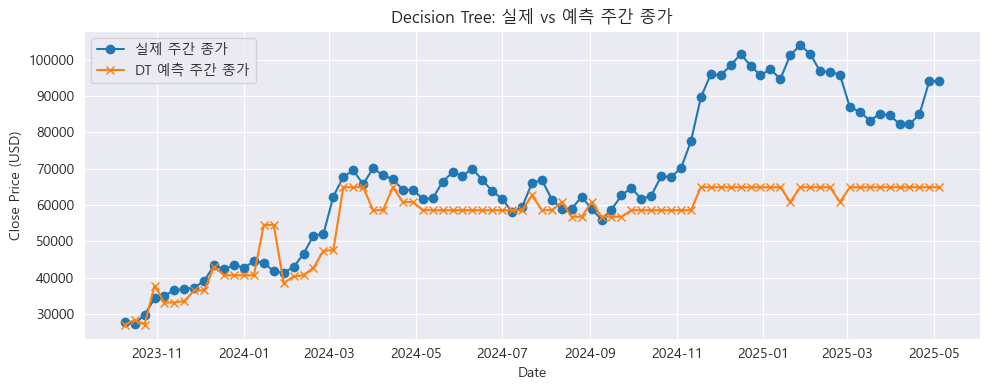

===== 회귀 모델 성능 (RMSE, R²) =====
            Model       RMSE     R2
Linear Regression  3826.4346 0.9656
    Decision Tree 17019.5984 0.3195

===== 분류 모델 성능 (F1 Score) =====
              Model  F1 Score
Logistic Regression    0.4375
      Decision Tree    0.4944

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.3902    0.4444    0.4156        36
           1     0.5238    0.4681    0.4944        47

    accuracy                         0.4578        83
   macro avg     0.4570    0.4563    0.4550        83
weighted avg     0.4659    0.4578    0.4602        83



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ─── 1) 데이터 로드 및 전처리 ─────────────────────────────────────────
df_chart = pd.read_csv(
    './chart/BINANCE_BTCUSDT_daily_UTC.csv',
    parse_dates=['date']
)
df_chart.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['OnchainValue'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])

df_chain_daily = (
    df_chain
    .groupby('Date', as_index=False)['OnchainValue']
    .sum()
)

df_merged = pd.merge(
    df_chart[['Date', 'Close']],
    df_chain_daily[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.set_index('Date', inplace=True)

# ─── 2) 주간 집계 (월요일 기준) ───────────────────────────────────────────
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ─── 3) 특성/레이블 생성 ──────────────────────────────────────────────────
weekly['ClosePrev'] = weekly['Close'].shift(1)
weekly['OnchainPrev'] = weekly['OnchainValue'].shift(1)
data = weekly.dropna(subset=['ClosePrev', 'OnchainPrev']).copy()

X_reg = data[['OnchainPrev', 'ClosePrev']].values
y_reg = data['Close'].values

data['Direction'] = np.where(data['Close'] > data['ClosePrev'], 1, 0)
X_clf = data[['OnchainPrev', 'ClosePrev']].values
y_clf = data['Direction'].values

# ─── 4) 훈련/테스트 분리 ──────────────────────────────────────────────────
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.3, shuffle=False
)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.3, shuffle=False
)

# ─── 5) 피처 스케일링 ─────────────────────────────────────────────────────
scaler_reg = StandardScaler()
Xr_train_scaled = scaler_reg.fit_transform(Xr_train)
Xr_test_scaled  = scaler_reg.transform(Xr_test)

scaler_clf = StandardScaler()
Xc_train_scaled = scaler_clf.fit_transform(Xc_train)
Xc_test_scaled  = scaler_clf.transform(Xc_test)

# ─── 6) 회귀 모델 정의 (2종) ─────────────────────────────────────────────
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# ─── 7) 분류 모델 정의 (2종) ─────────────────────────────────────────────
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# ─── 8) 회귀 학습 및 평가 ─────────────────────────────────────────────────
reg_results = []
for name, model in regressors.items():
    model.fit(Xr_train_scaled, yr_train)
    y_pred = model.predict(Xr_test_scaled)

    rmse = np.sqrt(mean_squared_error(yr_test, y_pred))
    r2 = r2_score(yr_test, y_pred)
    reg_results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

reg_results_df = pd.DataFrame(reg_results)

# ─── 9) 분류 학습 및 F1 스코어 평가 ───────────────────────────────────────
clf_results = []
for name, model in classifiers.items():
    model.fit(Xc_train_scaled, yc_train)
    y_pred = model.predict(Xc_test_scaled)

    f1 = f1_score(yc_test, y_pred, average='binary')
    clf_results.append({'Model': name, 'F1 Score': f1})

clf_results_df = pd.DataFrame(clf_results)

# ─── 10) 결과 시각화 예시: Decision Tree Regressor ───────────────────────
test_dates = data['Date'].iloc[-len(yr_test):]

dt_reg = regressors['Decision Tree']
y_pred_dt = dt_reg.predict(Xr_test_scaled)

plt.figure(figsize=(10, 4))
plt.plot(test_dates, yr_test, label='실제 주간 종가', marker='o')
plt.plot(test_dates, y_pred_dt, label='DT 예측 주간 종가', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Decision Tree: 실제 vs 예측 주간 종가')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── 11) 결과 출력 ───────────────────────────────────────────────────────
print("===== 회귀 모델 성능 (RMSE, R²) =====")
print(reg_results_df.to_string(index=False, float_format='{:.4f}'.format))

print("\n===== 분류 모델 성능 (F1 Score) =====")
print(clf_results_df.to_string(index=False, float_format='{:.4f}'.format))

# ─── 12) Decision Tree 분류 리포트 ────────────────────────────────────────
dt_clf = classifiers['Decision Tree']
y_pred_dt_clf = dt_clf.predict(Xc_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(yc_test, y_pred_dt_clf, digits=4))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib

# ─── 1) 데이터 로드 및 전처리: 일별 Chart & Onchain 병합 ────────────────────────────────
# 1-1) 차트 데이터 불러오기
df_chart = pd.read_csv(
    './chart/BINANCE_BTCUSDT_daily_UTC.csv',
    parse_dates=['date']
)
df_chart.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

# 1-2) 온체인 데이터 불러오기
df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['OnchainValue'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])

# 1-3) 일별 온체인 합계 계산
df_chain_daily = (
    df_chain
    .groupby('Date', as_index=False)['OnchainValue']
    .sum()
)

# 1-4) 일별 차트 & 온체인 병합
df_merged = pd.merge(
    df_chart[['Date', 'Close']],
    df_chain_daily[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.set_index('Date', inplace=True)

# ─── 2) 날짜 필터링: 2020-01-01 ~ 2025-04-30 ─────────────────────────────────────────────
df_daily = df_merged.copy()
df_daily = df_daily[(df_daily.index >= '2020-01-01') & (df_daily.index <= '2025-04-30')].copy()

# ─── 3) 주단위 그룹핑을 위한 WeekStart 컬럼 추가 (월요일 기준) ──────────────────────────────
df_daily['WeekStart'] = (
    df_daily.index.to_series()
             .dt.to_period('W-MON')
             .apply(lambda r: r.start_time)
)

# ─── 4) 주별로 그룹화 → 해당 주의 일간 데이터로 Linear Regression 학습 → 주별 R² 계산 ─────────
weekly_r2 = []
for week_start, group in df_daily.groupby('WeekStart'):
    if len(group) < 2:
        r2_value = np.nan
    else:
        X = group[['OnchainValue']].values  # (n_days, 1)
        y = group['Close'].values           # (n_days,)
        lr = LinearRegression()
        lr.fit(X, y)
        r2_value = lr.score(X, y)
    weekly_r2.append({'WeekStart': week_start, 'R2': r2_value})

r2_df = pd.DataFrame(weekly_r2)

# ─── 5) 월별 평균 R² 계산 ────────────────────────────────────────────────────────────────
# YearMonth 컬럼(예: '2020-06') 추가
r2_df['YearMonth'] = r2_df['WeekStart'].dt.to_period('M').astype(str)

# 같은 달(YearMonth)끼리 묶어서 주별 R² 평균
monthly_r2_df = (
    r2_df
    .groupby('YearMonth', as_index=False)['R2']
    .mean()
)

# ─── 6) Year/Month 컬럼 추가 ────────────────────────────────────────────────────────────
monthly_r2_df['Year'] = monthly_r2_df['YearMonth'].str.split('-').str[0]
monthly_r2_df['Month'] = monthly_r2_df['YearMonth'].str.split('-').str[1]

# ─── 7) 연도별·월별 데이터 피벗 → 표 형태 생성 ───────────────────────────────────────────
table_df = monthly_r2_df.pivot(index='Year', columns='Month', values='R2')
table_df = table_df.reindex(columns=[f"{i:02d}" for i in range(1, 13)])

# ─── 8) 스타일 함수 정의 ──────────────────────────────────────────────────────────────
def color_gradient(val):
    # NaN은 흰색
    if pd.isna(val):
        return ''
    # R² 값 기준으로 그라데이션: 낮으면 연한, 높으면 진한 파란색
    cmap = matplotlib.cm.get_cmap('Blues')
    rgba = cmap(val)  # 0~1 사이에서 색 선택
    hex_color = matplotlib.colors.rgb2hex(rgba)
    return f'background-color: {hex_color}; color: #000000;'

# ─── 9) 스타일 적용 및 표시 ───────────────────────────────────────────────────────────
styled_table = table_df.style.applymap(color_gradient).set_caption("연도별 월별 R²")
display(styled_table)


C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\2975367944.py:97: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = table_df.style.applymap(color_gradient).set_caption("연도별 월별 R²")
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\2975367944.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Blues')


Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020,nan,0.459574,0.115190,0.154833,0.475694,0.653136,0.127910,0.220429,0.162959,0.301634,0.183701,0.205920
2021,0.192104,0.246562,0.187597,0.259432,0.143529,0.201772,0.164169,0.161338,0.367802,0.362932,0.211230,0.396843
2022,0.216172,0.076420,0.164008,0.142513,0.285465,0.563756,0.252327,0.161221,0.071680,0.104812,0.160451,0.148119
2023,0.275395,0.248841,0.296642,0.258137,0.370109,0.241425,0.169372,0.163022,0.070873,0.148751,0.147454,0.337911
2024,0.160003,0.155744,0.154020,0.216313,0.478495,0.352272,0.311851,0.186348,0.120321,0.090974,0.085036,0.166920
2025,0.330591,0.238401,0.163756,0.436719,nan,nan,nan,nan,nan,nan,nan,nan


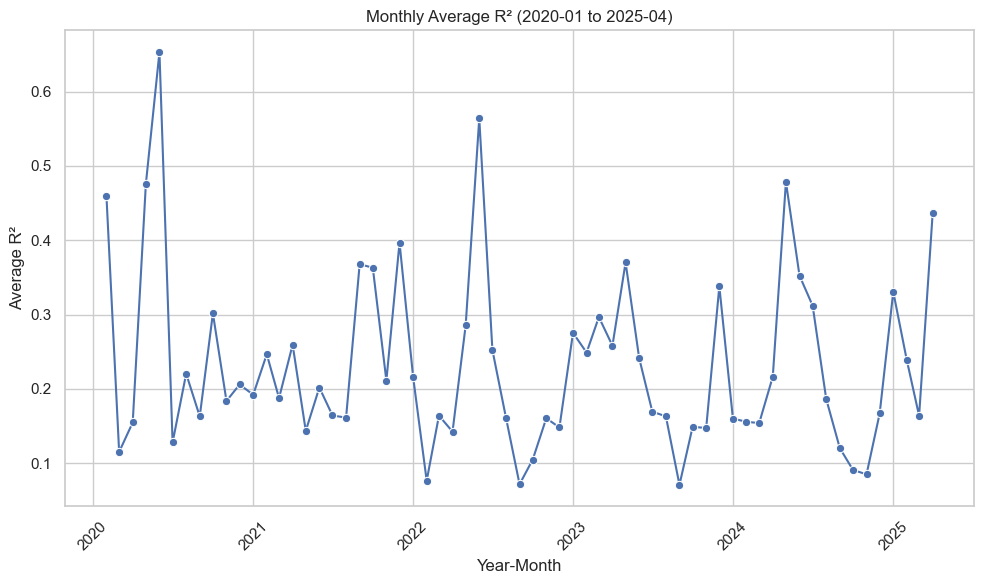

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV에서 불러오기
monthly_r2_df = pd.read_csv('./onchain/monthly_r2_2020-2025.csv')

# 문자열 형태의 YearMonth를 datetime으로 변환
monthly_r2_df['YearMonth'] = pd.to_datetime(monthly_r2_df['YearMonth'], format='%Y-%m')

# Seaborn 스타일 세팅 (선택 사항)
sns.set_theme(style="whitegrid")

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_r2_df,
    x='YearMonth',
    y='R2',
    marker='o'
)

plt.title("Monthly Average R² (2020-01 to 2025-04)")
plt.xlabel("Year-Month")
plt.ylabel("Average R²")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 실험 결과 | 커뮤니티, 차트, 온체인을 통한 분석표

<!-- # 실험 결과 | 커뮤니티, 차트, 온체인 동시 분석 -->

In [ ]:
# 커뮤니티 + 차트, 차트 + 온체인을 통해서 나온 월별 예측, 상승 하락, 상관계수를 정리하여서 표로 나타냈습니다

# 모텔링 분석 | 커뮤니티

In [ ]:
# DataAnlySis.ipynb 파일로 분리하였습니다

# 모텔링 분석 | 차트

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 한글 폰트 설정 (환경에 맞게 글꼴명 또는 경로를 수정)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

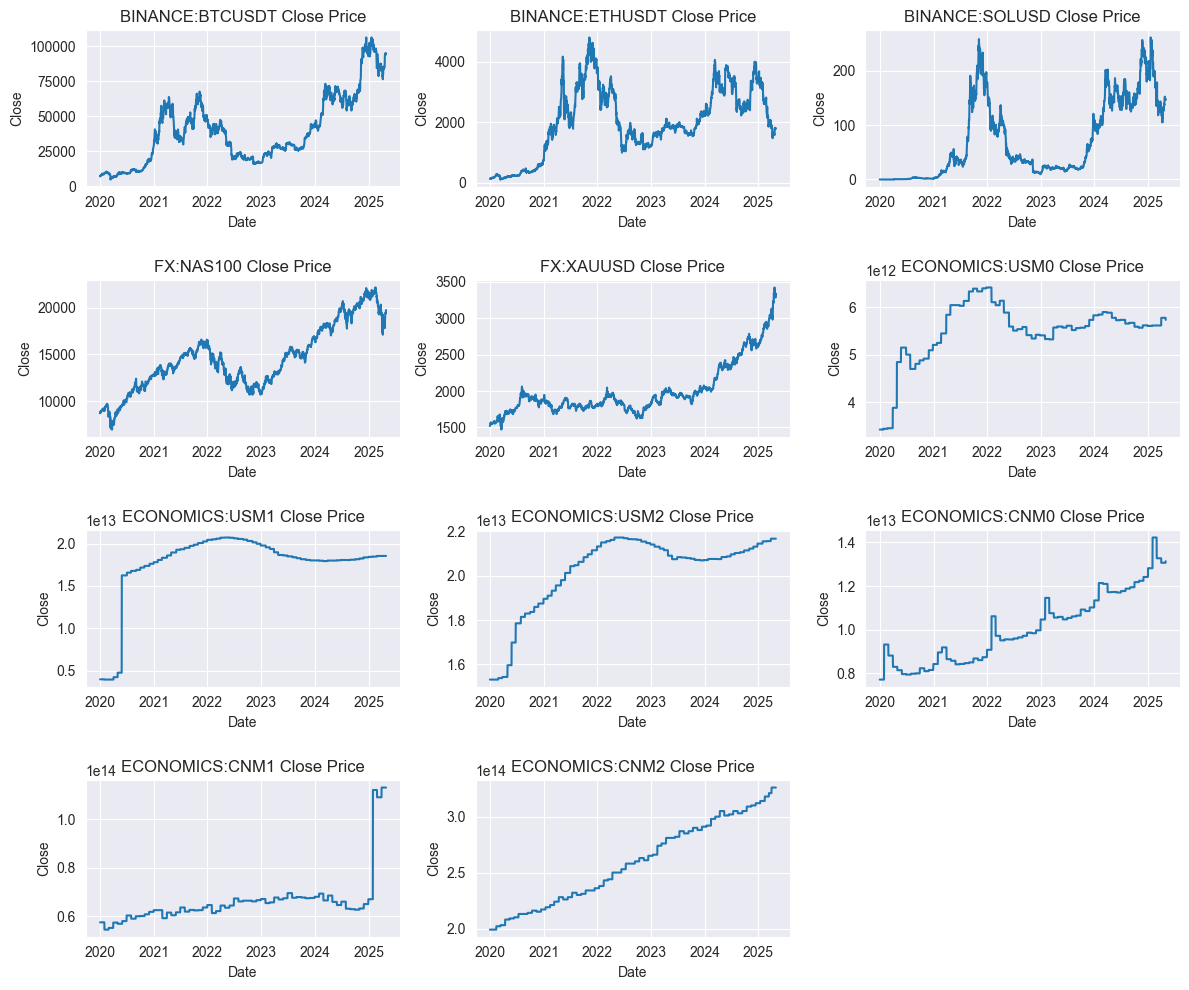

=== Weekly Correlation Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Correlation
BINANCE:BTCUSDT BINANCE:ETHUSDT     0.774034
BINANCE:ETHUSDT  BINANCE:SOLUSD     0.603243
BINANCE:BTCUSDT  BINANCE:SOLUSD     0.519148
BINANCE:ETHUSDT       FX:NAS100     0.362967
BINANCE:BTCUSDT       FX:NAS100     0.296511
 BINANCE:SOLUSD       FX:NAS100     0.209996
      FX:NAS100       FX:XAUUSD     0.178270
BINANCE:ETHUSDT  ECONOMICS:USM2     0.104979
BINANCE:BTCUSDT  ECONOMICS:USM0     0.102109
BINANCE:BTCUSDT       FX:XAUUSD     0.094576

=== Monthly Correlation Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Correlation
BINANCE:BTCUSDT BINANCE:ETHUSDT     0.748650
BINANCE:ETHUSDT       FX:NAS100     0.634017
BINANCE:ETHUSDT  BINANCE:SOLUSD     0.611708
BINANCE:BTCUSDT       FX:NAS100     0.511571
BINANCE:BTCUSDT  BINANCE:SOLUSD     0.448414
      FX:NAS100  ECONOMICS:USM0     0.405664
 BINANCE:SOLUSD       FX:NAS100     0.384384
BINANCE:ETHUSDT  ECONOMICS:USM0     0.375856
BINA

C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\4137886385.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = close_df.resample('M').last().pct_change().dropna()


In [7]:
# Step 1: 라이브러리 임포트 및 심볼 정의
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

symbols = [
    "BINANCE:BTCUSDT", "BINANCE:ETHUSDT", "BINANCE:SOLUSD",
    "FX:NAS100", "FX:XAUUSD",
    "ECONOMICS:USM0", "ECONOMICS:USM1", "ECONOMICS:USM2",
    "ECONOMICS:CNM0", "ECONOMICS:CNM1", "ECONOMICS:CNM2"
]
data = {}

# --- CSV 파일 로드 (data 채우기) ---
for sym in symbols:
    filepath = f"./chart/{sym.replace(':', '_')}_daily_UTC.csv"
    if not os.path.exists(filepath):
        continue

    df = pd.read_csv(filepath, parse_dates=['date'])
    df = df.drop_duplicates(subset='date').sort_values('date').set_index('date')
    data[sym] = df

# 여기서 available_symbols 정의
available_symbols = list(data.keys())

# === 수정된 Step 2: 하나의 Figure에 여러 Subplot으로 그리기 ===
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, sym in enumerate(available_symbols):
    df = data[sym]
    sns.lineplot(x=df.index, y=df['close'], ax=axes[i])
    axes[i].set_title(f"{sym} Close Price")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Close")

for j in range(len(available_symbols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Step 3: 종가만 모아서 하나의 DataFrame으로 결합
# 파일이 로드된 심볼들만 사용
available_symbols = list(data.keys())
close_df = pd.DataFrame({sym: data[sym]['close'] for sym in available_symbols})

# Step 4: 주간 및 월간 수익률 계산
weekly_returns = close_df.resample('W').last().pct_change().dropna()
monthly_returns = close_df.resample('M').last().pct_change().dropna()

# Step 5: 상관계수 행렬 계산
weekly_corr = weekly_returns.corr()
monthly_corr = monthly_returns.corr()

# Step 6: 상관계수 행렬을 쌍별로 펼쳐서 랭킹 생성
def flatten_corr(corr_df):
    pairs = []
    syms = corr_df.columns.tolist()
    for i in range(len(syms)):
        for j in range(i+1, len(syms)):
            pairs.append({
                'Symbol 1': syms[i],
                'Symbol 2': syms[j],
                'Correlation': corr_df.iloc[i, j]
            })
    return pd.DataFrame(pairs)

weekly_pairs = flatten_corr(weekly_corr).sort_values('Correlation', ascending=False)
monthly_pairs = flatten_corr(monthly_corr).sort_values('Correlation', ascending=False)

# Step 7: USM끼리, CNM끼리는 제외
def exclude_same_group(df):
    mask_usm = df['Symbol 1'].str.startswith("ECONOMICS:USM") & df['Symbol 2'].str.startswith("ECONOMICS:USM")
    mask_cnm = df['Symbol 1'].str.startswith("ECONOMICS:CNM") & df['Symbol 2'].str.startswith("ECONOMICS:CNM")
    return df[~(mask_usm | mask_cnm)]

weekly_pairs = exclude_same_group(weekly_pairs).sort_values('Correlation', ascending=False)
monthly_pairs = exclude_same_group(monthly_pairs).sort_values('Correlation', ascending=False)

# Step 8: 결과 출력 (상위 10개만 예시로 출력)
print("=== Weekly Correlation Top 10 (USM·CNM 제외) ===")
print(weekly_pairs.head(10).to_string(index=False))
print("\n=== Monthly Correlation Top 10 (USM·CNM 제외) ===")
print(monthly_pairs.head(10).to_string(index=False))

# 필요하면 CSV로 저장
# weekly_pairs.to_csv("weekly_correlation_rankings.csv", index=False)
# monthly_pairs.to_csv("monthly_correlation_rankings.csv", index=False)


=== Weekly Top 10 Correlations (USM·CNM 제외) ===
BTCUSDT ↔ ETHUSDT: 0.7740
ETHUSDT ↔ SOLUSD: 0.6032
BTCUSDT ↔ SOLUSD: 0.5191
ETHUSDT ↔ NAS100: 0.3630
BTCUSDT ↔ NAS100: 0.2965
SOLUSD ↔ NAS100: 0.2100
NAS100 ↔ XAUUSD: 0.1783
ETHUSDT ↔ USM2: 0.1050
BTCUSDT ↔ USM0: 0.1021
BTCUSDT ↔ XAUUSD: 0.0946

=== Monthly Top 10 Correlations (USM·CNM 제외) ===
BTCUSDT ↔ ETHUSDT: 0.7486
ETHUSDT ↔ NAS100: 0.6340
ETHUSDT ↔ SOLUSD: 0.6117
BTCUSDT ↔ NAS100: 0.5116
BTCUSDT ↔ SOLUSD: 0.4484
NAS100 ↔ USM0: 0.4057
SOLUSD ↔ NAS100: 0.3844
ETHUSDT ↔ USM0: 0.3759
BTCUSDT ↔ USM0: 0.3510
SOLUSD ↔ USM0: 0.2490


C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:29: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:29: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  fig.canvas.print_figure(b

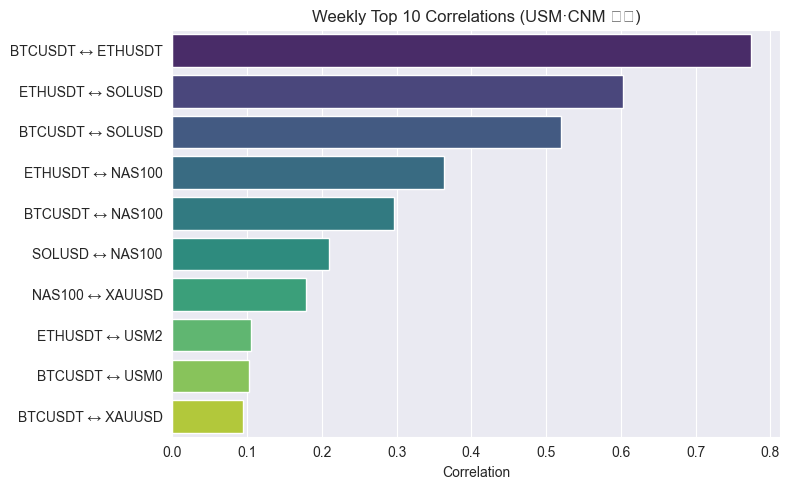

C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:43: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\634820404.py:43: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kmj\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) Arial.
  fig.canvas.print_figure(b

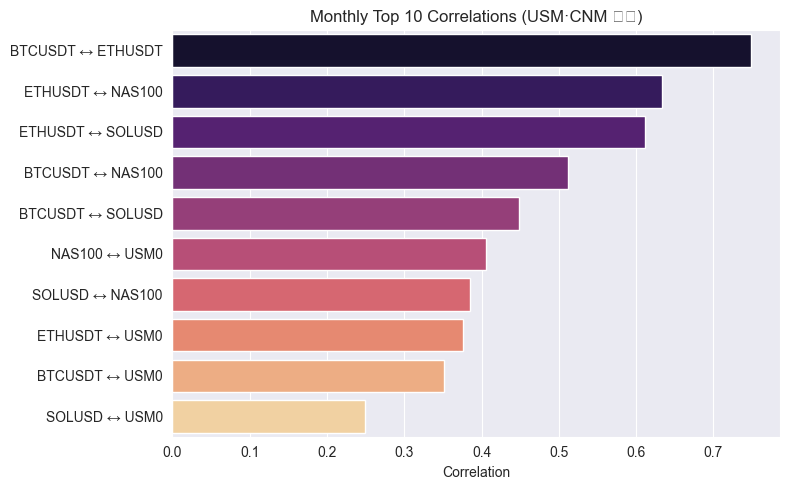

In [5]:
# --- 1) 상위 10개 데이터 추출 ---
top_w = weekly_pairs.head(10).copy()
top_m = monthly_pairs.head(10).copy()

# 막대그래프용으로 “Symbol 1 vs Symbol 2” 문자열 컬럼 추가
top_w['Pair'] = top_w['Symbol 1'].str.split(':').str[-1] + " ↔ " + top_w['Symbol 2'].str.split(':').str[-1]
top_m['Pair'] = top_m['Symbol 1'].str.split(':').str[-1] + " ↔ " + top_m['Symbol 2'].str.split(':').str[-1]

# --- 1.5) 글자로도 결과 출력 ---
print("=== Weekly Top 10 Correlations (USM·CNM 제외) ===")
for _, row in top_w.iterrows():
    print(f"{row['Pair']}: {row['Correlation']:.4f}")

print("\n=== Monthly Top 10 Correlations (USM·CNM 제외) ===")
for _, row in top_m.iterrows():
    print(f"{row['Pair']}: {row['Correlation']:.4f}")

# --- 2) Weekly 상위 10 막대그래프 ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_w,
    x='Correlation',
    y='Pair',
    palette='viridis'
)
plt.title("Weekly Top 10 Correlations (USM·CNM 제외)")
plt.xlabel("Correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- 3) Monthly 상위 10 막대그래프 ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_m,
    x='Correlation',
    y='Pair',
    palette='magma'
)
plt.title("Monthly Top 10 Correlations (USM·CNM 제외)")
plt.xlabel("Correlation")
plt.ylabel("")
plt.tight_layout()
plt.show()


# 모텔링 분석 | 온체인

In [8]:
# 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models, optimizers, callbacks
from datetime import datetime, timedelta

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

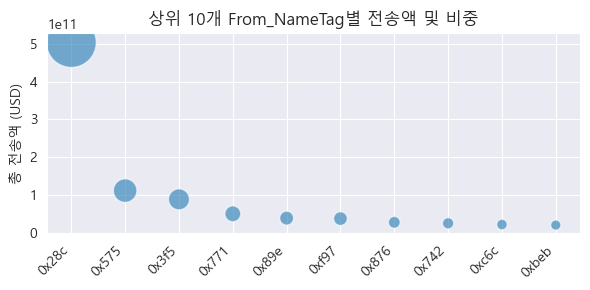

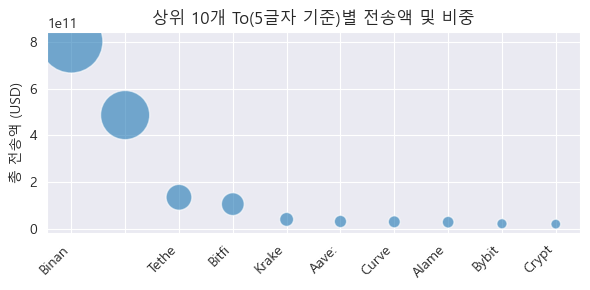

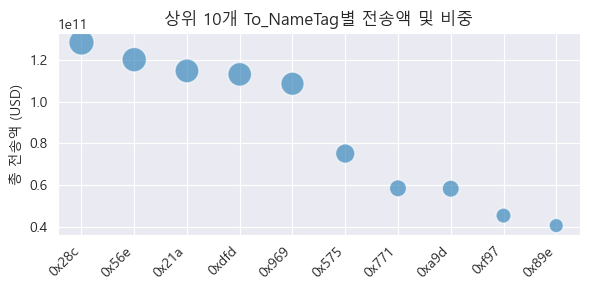

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

file_path = './onchain/usdt_onchain.csv'

# 1) CSV 읽기 (gzip / utf-8 시도 → 실패 시 latin1)
try:
    df = pd.read_csv(file_path, compression='gzip', encoding='utf-8')
except (OSError, UnicodeDecodeError):
    df = pd.read_csv(file_path, encoding='latin1')

# 2) 컬럼명 앞뒤 공백 제거
df.columns = df.columns.str.strip()

# 3) ValueUSD 전처리: "$","," 제거 후 숫자형으로 변환
df['ValueUSD'] = (
    df['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
)

# 4) Date 컬럼을 datetime 형으로 변환
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 5) 필요한 컬럼만 추출
df = df[['Date', 'From_NameTag', 'To', 'To_NameTag', 'Amount', 'ValueUSD']].dropna(subset=['Date', 'ValueUSD'])

# 함수: 지정된 컬럼별 상위 10개 버블맵 그리기
def plot_bubble(df, group_col, title):
    grouped = (
        df.groupby(group_col)
          .agg(total_value=('ValueUSD', 'sum'))
          .reset_index()
    )
    grouped['proportion'] = grouped['total_value'] / grouped['total_value'].sum()
    top10 = grouped.sort_values('total_value', ascending=False).head(10).reset_index(drop=True)
    top10['short_name'] = top10[group_col].astype(str).str.slice(0, 5)

    plt.figure(figsize=(6, 3))
    x = range(len(top10))
    y = top10['total_value']
    sizes = top10['proportion'] * 5000

    plt.scatter(x, y, s=sizes, alpha=0.6, edgecolors='w')
    plt.xticks(x, top10['short_name'], rotation=45, ha='right')
    plt.ylabel('총 전송액 (USD)')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 6) From_NameTag 기준 버블맵
plot_bubble(df, 'From_NameTag', '상위 10개 From_NameTag별 전송액 및 비중')

# 7) To 기준 버블맵
df['To_prefix5'] = df['To'].str.slice(0, 5)
plot_bubble(df, 'To_prefix5', '상위 10개 To(5글자 기준)별 전송액 및 비중')

# 8) To_NameTag 기준 버블맵
plot_bubble(df, 'To_NameTag', '상위 10개 To_NameTag별 전송액 및 비중')


In [14]:
# --- 2) 일별 집계 생성 ---
# (가정: df에 'Date' 컬럼이 datetime, 'ValueUSD'가 숫자형으로 들어 있음)

# 2-1) Date가 문자열인 경우 datetime 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2-2) 일별 합계(sum)와 건수(count) 집계
daily_agg = (
    df
    .groupby(df['Date'].dt.date)  # 날짜만 뽑아서 그룹화
    .agg(
        daily_sum=('ValueUSD', 'sum'),
        daily_count=('ValueUSD', 'count')
    )
    .reset_index()
    .rename(columns={'Date': 'Date'})  # 컬럼명 그대로
)

                                Date      ValueUSD
count                          46375  4.637500e+04
mean   2023-03-11 13:53:45.367115776  4.197627e+07
min              2020-01-03 00:00:00  1.600000e+07
25%              2021-10-28 00:00:00  2.000000e+07
50%              2023-03-16 00:00:00  2.685388e+07
75%              2024-09-02 00:00:00  4.626160e+07
max              2025-04-30 00:00:00  9.999999e+08
std                              NaN  5.165610e+07


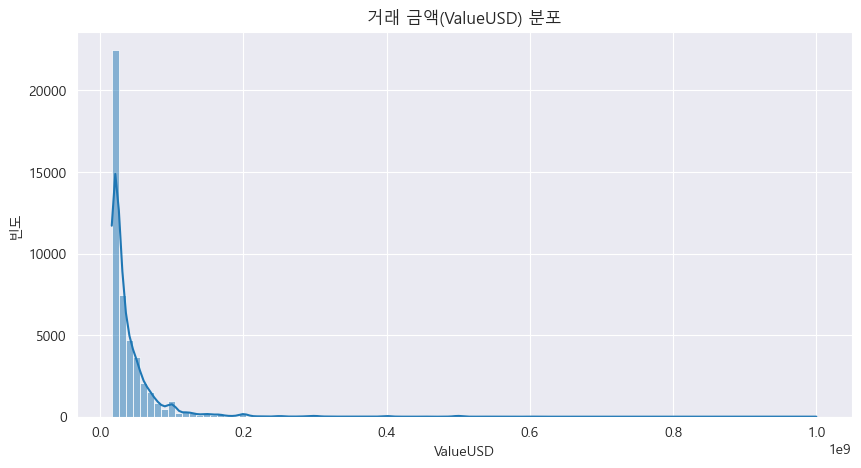

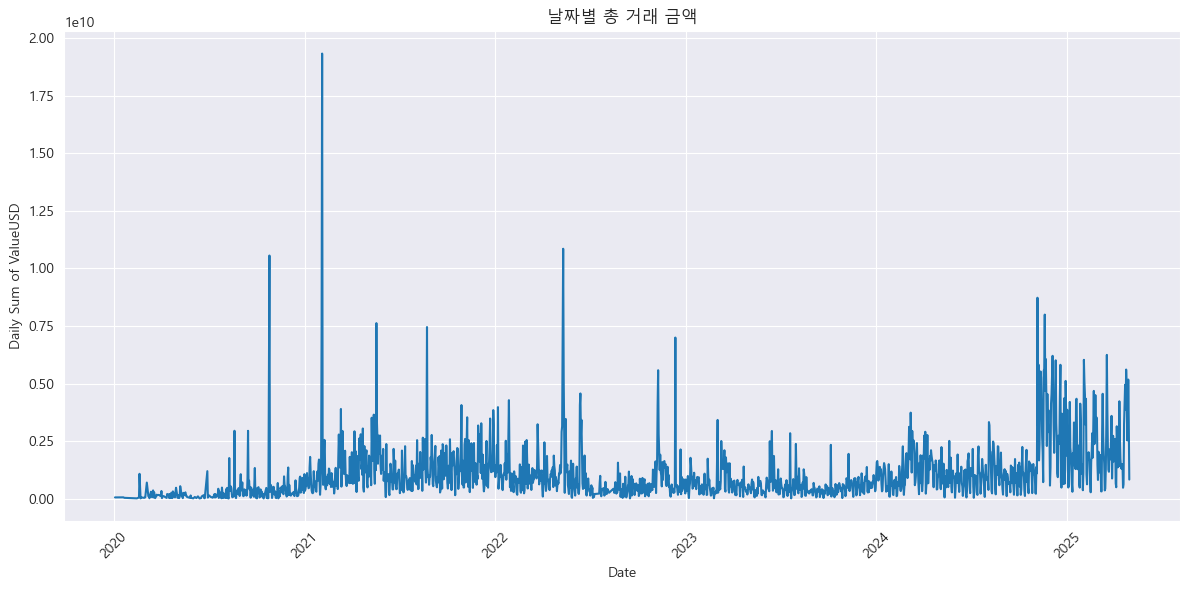

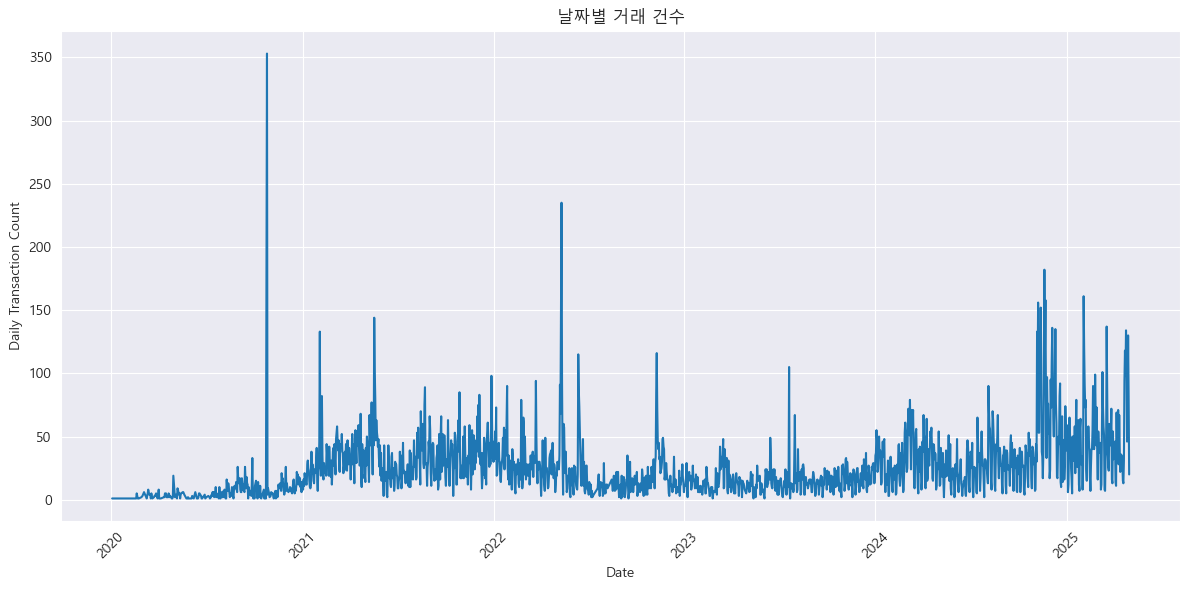

In [15]:
# 3) 탐색적 데이터 분석(EDA): 기초 통계 및 시각화

# 3-1) 기초 통계 출력
print(df.describe())

# 3-2) 거래 금액(ValueUSD) 분포 히스토그램 (seaborn 사용)
plt.figure(figsize=(10, 5))
sns.histplot(df['ValueUSD'].dropna(), bins=100, kde=True)
plt.title('거래 금액(ValueUSD) 분포')
plt.xlabel('ValueUSD')
plt.ylabel('빈도')
plt.show()

# 3-4) 날짜별 총 거래 금액 시각화 (seaborn 사용)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_agg, x='Date', y='daily_sum')
plt.title('날짜별 총 거래 금액')
plt.xlabel('Date')
plt.ylabel('Daily Sum of ValueUSD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3-5) 날짜별 거래 건수 시각화 (seaborn 사용)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_agg, x='Date', y='daily_count')
plt.title('날짜별 거래 건수')
plt.xlabel('Date')
plt.ylabel('Daily Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 실험 분석 | 커뮤니티와 차트 분석

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ============================
# 설정: 파일 경로 지정
# ============================
WORD_FILE  = './community/monthly_word_alt.csv'               # 예: 'monthly_word_alt.csv'
# WORD_FILE  = './community/monthly_word_Chart.csv'               # 예: 'monthly_word_alt.csv'
# WORD_FILE  = './community/monthly_word_electronicmoney.csv'               # 예: 'monthly_word_alt.csv'
CHART_FILE = './chart/BINANCE_BTCUSDT_daily_UTC.csv'

# ============================
# 1) 월별 단어 빈도 데이터 로드
# ============================
# 파일이 “콤마(,) 구분된 CSV”이므로 sep=',' 사용
df_words = pd.read_csv(
    WORD_FILE,
    sep=',',
    encoding='utf-8-sig'
)
# 컬럼: ['month', 'count', 'rankw', 'word', 'frequency']
print("읽은 df_words 컬럼명:", df_words.columns.tolist())

# ============================
# 2) df_chart(일별 BTCUSDT 차트) 데이터 로드
# ============================
df_chart = pd.read_csv(
    CHART_FILE,
    parse_dates=['date']
)

# ============================
# 3) 데이터 전처리: 'year_month' 생성 & 월별 등락률 계산
# ============================
# 3-1) df_words: 'month' 열이 이미 'YYYY-MM' 형식이므로 바로 활용
df_words['year_month'] = df_words['month']  # 예: "2020-01", "2020-02", …

# 3-2) df_chart: 'date' → 'year_month'(period) → 시가/종가 집계 → 등락률 계산
df_chart['year_month'] = df_chart['date'].dt.to_period('M')
monthly_prices = (
    df_chart
    .groupby('year_month')['close']
    .agg(first='first', last='last')
    .reset_index()
)
monthly_prices['pct_change'] = (
    monthly_prices['last'] - monthly_prices['first']
) / monthly_prices['first']
monthly_prices['year_month'] = monthly_prices['year_month'].dt.strftime('%Y-%m')

# 3-3) 등락률 기준으로 카테고리 분류: down(≤-10%), neutral(–10%~+10%), up(≥+10%)
monthly_prices['category'] = pd.cut(
    monthly_prices['pct_change'],
    bins=[-np.inf, -0.10, 0.10, np.inf],
    labels=['down', 'neutral', 'up']
)

print("\n월별 등락률 예시:")
print(monthly_prices[['year_month','first','last','pct_change','category']].head())

# ============================
# 4) 병합 및 상위 단어 추출
# ============================
df_merged = pd.merge(
    df_words,
    monthly_prices[['year_month','category','pct_change']],
    on='year_month',
    how='inner'
)

# 4-1) 카테고리별 단어 빈도 합계 → 상위 5개
category_word_freq = (
    df_merged
    .groupby(['category','word'])['frequency']
    .sum()
    .reset_index()
)
top_words_by_category = (
    category_word_freq
    .sort_values(['category','frequency'], ascending=[True, False])
    .groupby('category')
    .head(5)
    .reset_index(drop=True)
)

print("\n=== 카테고리별 상위 5개 단어 (빈도 합계 기준) ===")
print(top_words_by_category.to_string(index=False))

# ============================
# 5) 단어 빈도와 등락률 상관계수 계산
# ============================
pivot_words = df_merged.pivot_table(
    index='year_month',
    columns='word',
    values='frequency',
    aggfunc='sum',
    fill_value=0
).reset_index()

corr_df = pd.merge(
    pivot_words,
    monthly_prices[['year_month','pct_change']],
    on='year_month',
    how='inner'
)

word_columns = corr_df.columns.drop(['year_month','pct_change'])
corr_series = corr_df[word_columns].corrwith(corr_df['pct_change']).sort_values(ascending=False)

top_positive_corr = corr_series.head(5).reset_index()
top_positive_corr.columns = ['단어','상관계수']
top_negative_corr = corr_series.tail(5).reset_index()
top_negative_corr.columns = ['단어','상관계수']

print("\n=== pct_change와 양(+) 상관 상위 5개 단어 ===")
print(top_positive_corr.round(4).to_string(index=False))

print("\n=== pct_change와 음(-) 상관 상위 5개 단어 ===")
print(top_negative_corr.round(4).to_string(index=False))

# ============================
# 6) CNN 모델 학습을 위한 데이터 준비
# ============================
X = corr_df[word_columns].values                   # (월 수, 단어 수)
X = X.reshape((X.shape[0], X.shape[1], 1))          # Conv1D 입력 형태: (samples, timesteps, channels)

le = LabelEncoder()
y = le.fit_transform(monthly_prices['category'])   # down→0, neutral→1, up→2

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ============================
# 7) 1D CNN 모델 정의 및 학습
# ============================
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print("\n=== CNN 모델 학습 시작 ===")
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.1,
    callbacks=[es],
    verbose=2
)

# ============================
# 8) 모델 평가 및 결과 출력
# ============================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n=== 테스트 세트 평가 ===\nLoss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# ============================
# 9) 모델링 기법 설명까지 일단 해주기
# ============================
print("\n=== 모델링 기법 설명 ===")
print(
    "이 스크립트에서는 '월별 단어 빈도 벡터'를 1차원 시계열처럼 보고,\n"
    "Conv1D(1D Convolutional Neural Network) 레이어를 통해 특징을 추출한 뒤\n"
    "GlobalMaxPooling1D → Dense → Softmax 구조로 'down', 'neutral', 'up' 세 클래스를 예측합니다.\n"
    "즉, 단어 빈도 패턴을 CNN이 학습하여 BTC 월별 등락 카테고리를 분류하는 모델링 방식입니다."
)

읽은 df_words 컬럼명: ['month', 'count', 'rank', 'word', 'frequency']

월별 등락률 예시:
  year_month    first     last  pct_change category
0    2020-01  9352.89  7200.85   -0.230094     down
1    2020-02  8523.61  9384.61    0.101014       up
2    2020-03  6410.44  8531.88    0.330935       up
3    2020-04  8620.00  6642.92   -0.229360     down
4    2020-05  9448.27  8826.96   -0.065759  neutral

=== 카테고리별 상위 5개 단어 (빈도 합계 기준) ===
category word  frequency
    down   코인       2519
    down   비트       2168
    down   버그       1264
    down   사람       1221
    down   따리        787
 neutral   코인       1411
 neutral   비트       1168
 neutral   사람        783
 neutral   정신        705
 neutral   존귀        438
      up   코인       1487
      up   비트       1292
      up  하나님       1211
      up   사람        855
      up   정신        513

=== pct_change와 양(+) 상관 상위 5개 단어 ===
 단어   상관계수
 팬티 0.4058
 누나 0.3510
 승현 0.3510
 치기 0.3510
박치기 0.3510

=== pct_change와 음(-) 상관 상위 5개 단어 ===
  단어    상관계수
  알트 -0.2647
  리퍼 -0.

C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\3799929507.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['category','word'])['frequency']
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\3799929507.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('category')
c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activ

6/6 - 1s - 225ms/step - accuracy: 0.4000 - loss: 10.0167 - val_accuracy: 0.5000 - val_loss: 10.3342
Epoch 2/20
6/6 - 0s - 19ms/step - accuracy: 0.3333 - loss: 6.7257 - val_accuracy: 0.3333 - val_loss: 6.9411
Epoch 3/20
6/6 - 0s - 18ms/step - accuracy: 0.4444 - loss: 4.0663 - val_accuracy: 0.1667 - val_loss: 3.9517
Epoch 4/20
6/6 - 0s - 21ms/step - accuracy: 0.4000 - loss: 1.3402 - val_accuracy: 0.3333 - val_loss: 2.0141
Epoch 5/20
6/6 - 0s - 19ms/step - accuracy: 0.2889 - loss: 1.7012 - val_accuracy: 0.3333 - val_loss: 0.9778
Epoch 6/20
6/6 - 0s - 19ms/step - accuracy: 0.3556 - loss: 1.4267 - val_accuracy: 0.1667 - val_loss: 1.3469
Epoch 7/20
6/6 - 0s - 19ms/step - accuracy: 0.4000 - loss: 1.2631 - val_accuracy: 0.1667 - val_loss: 2.3436
Epoch 8/20
6/6 - 0s - 20ms/step - accuracy: 0.3778 - loss: 1.2282 - val_accuracy: 0.5000 - val_loss: 1.1248

=== 테스트 세트 평가 ===
Loss: 1.8683, Accuracy: 0.3077

=== 모델링 기법 설명 ===
이 스크립트에서는 '월별 단어 빈도 벡터'를 1차원 시계열처럼 보고,
Conv1D(1D Convolutional Neural Netwo

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ============================
# 1) 파일 경로 지정
# ============================
# WORD_FILE  = './community/monthly_word_alt.csv'
CHART_FILE = './chart/BINANCE_BTCUSDT_daily_UTC.csv'

# ============================
# 2) 월별 단어 빈도 데이터 로드
# ============================
df_words = pd.read_csv(
    WORD_FILE,
    sep=',',
    encoding='utf-8-sig'
)
# 컬럼: ['month','count','rankw','word','frequency']
# 'month'는 'YYYY-MM' 형식이라고 가정

# ============================
# 3) BTC 차트 데이터 로드 → 월별 등락률 계산
# ============================
df_chart = pd.read_csv(CHART_FILE, parse_dates=['date'])
df_chart['year_month'] = df_chart['date'].dt.to_period('M')

monthly_prices = (
    df_chart
    .groupby('year_month')['close']
    .agg(first='first', last='last')
    .reset_index()
)
monthly_prices['pct_change'] = (
    monthly_prices['last'] - monthly_prices['first']
) / monthly_prices['first']
monthly_prices['year_month'] = monthly_prices['year_month'].dt.strftime('%Y-%m')
monthly_prices['category'] = pd.cut(
    monthly_prices['pct_change'],
    bins=[-np.inf, -0.10, 0.10, np.inf],
    labels=['down', 'neutral', 'up']
)

# ============================
# 4) 월별 상위 10개 단어 추출
# ============================
df_words['year_month'] = df_words['month']
top10_per_month = (
    df_words
    .sort_values(['month','frequency'], ascending=[True, False])
    .groupby('month')
    .head(10)
    .reset_index(drop=True)
)
months_sorted = sorted(df_words['month'].unique())

# ============================
# 5) CNN 입력 데이터 준비 (월별 상위 10개 단어 빈도)
# ============================
X_list = []
for m in months_sorted:
    subset = top10_per_month[top10_per_month['month'] == m]
    freqs = subset['frequency'].tolist()
    if len(freqs) < 10:
        freqs += [0] * (10 - len(freqs))
    X_list.append(freqs)
X_arr = np.array(X_list, dtype=float)
X = X_arr.reshape((X_arr.shape[0], X_arr.shape[1], 1))

# y: 카테고리 인코딩
le = LabelEncoder()
y = le.fit_transform(monthly_prices.set_index('year_month').loc[months_sorted, 'category'].values)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# 6) 1D CNN 모델 정의 및 학습
# ============================
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10,1)),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.1,
    callbacks=[es],
    verbose=2
)

# ============================
# 7) 모델 평가 및 예측
# ============================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"==== 테스트 세트 평가: Loss={loss:.4f}, Accuracy={accuracy:.4f} ====\n")

probabilities = model.predict(X, verbose=0)
up_prob = probabilities[:, 2]  # “up” 클래스 확률
pred_classes = np.argmax(probabilities, axis=1)
predicted_labels = le.inverse_transform(pred_classes)

# ============================
# 8) 결과 정리
# ============================
results_df = pd.DataFrame({
    'month':             months_sorted,
    'actual_category':   monthly_prices.set_index('year_month').loc[months_sorted, 'category'].values,
    'predicted_category': predicted_labels,
    'up_probability':    up_prob.round(4),
    'pct_change':        monthly_prices.set_index('year_month').loc[months_sorted, 'pct_change'].values
})

# ============================
# 9) 연도·월 분리
# ============================
results_df[['year', 'month_num']] = results_df['month'].str.split('-', expand=True)
results_df['year'] = results_df['year'].astype(int)
results_df['month_num'] = results_df['month_num'].astype(int)

# ============================
# 10) 가로형 피벗: 각 필드를 연도별 1~12월 컬럼으로
# ============================

# ============================
# 10-1) actual_price 피벗: 월별 종가(‘last’) 기준으로
# ============================
# 10-1-a) monthly_prices에서 'year', 'month_num', 'last' 컬럼 준비
monthly_prices[['year', 'month_num']] = monthly_prices['year_month'].str.split('-', expand=True)
monthly_prices['year'] = monthly_prices['year'].astype(int)
monthly_prices['month_num'] = monthly_prices['month_num'].astype(int)

# 10-1-b) 피벗 생성: index=year, columns=month_num, values=last (월말 종가)
pivot_actual = (
    monthly_prices
    .pivot(index='year', columns='month_num', values='last')
)
pivot_actual.columns = [f"{m:02d}" for m in pivot_actual.columns]
pivot_actual = pivot_actual.reindex(columns=[f"{m:02d}" for m in range(1, 13)])

# 10-2) predicted_category 피벗
pivot_pred = (
    results_df
    .pivot(index='year', columns='month_num', values='predicted_category')
)
pivot_pred.columns = [f"{m:02d}" for m in pivot_pred.columns]
pivot_pred = pivot_pred.reindex(columns=[f"{m:02d}" for m in range(1, 13)])

# 10-3) up_probability 피벗
pivot_prob = (
    results_df
    .pivot(index='year', columns='month_num', values='up_probability')
)
pivot_prob.columns = [f"{m:02d}" for m in pivot_prob.columns]
pivot_prob = pivot_prob.reindex(columns=[f"{m:02d}" for m in range(1, 13)])

# ============================
# 11) CSV로 저장
# ============================
# pivot_actual.to_csv('.result/actual_category_by_year.csv', encoding='utf-8-sig')
# pivot_pred.to_csv('.result/predicted_category_by_year.csv', encoding='utf-8-sig')
# pivot_prob.to_csv('.result/up_probability_by_year.csv', encoding='utf-8-sig')

# ============================
# 12) 출력 확인
# ============================
print("==== 연도별 월별 실제 카테고리 ====")
print(pivot_actual)
print("\n==== 연도별 월별 예측 카테고리 ====")
print(pivot_pred)
print("\n==== 연도별 월별 up_probability ====")
print(pivot_prob)

Epoch 1/20


c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 1s - 217ms/step - accuracy: 0.4000 - loss: 4.0916 - val_accuracy: 0.5000 - val_loss: 1.8567
Epoch 2/20
6/6 - 0s - 20ms/step - accuracy: 0.3556 - loss: 2.8318 - val_accuracy: 0.5000 - val_loss: 1.0615
Epoch 3/20
6/6 - 0s - 19ms/step - accuracy: 0.3111 - loss: 1.6921 - val_accuracy: 0.1667 - val_loss: 1.9027
Epoch 4/20
6/6 - 0s - 17ms/step - accuracy: 0.3778 - loss: 2.0681 - val_accuracy: 0.3333 - val_loss: 1.9663
Epoch 5/20
6/6 - 0s - 22ms/step - accuracy: 0.3111 - loss: 1.5926 - val_accuracy: 0.5000 - val_loss: 0.9715
Epoch 6/20
6/6 - 0s - 23ms/step - accuracy: 0.2222 - loss: 1.7429 - val_accuracy: 0.6667 - val_loss: 1.0345
Epoch 7/20
6/6 - 0s - 21ms/step - accuracy: 0.4222 - loss: 1.3209 - val_accuracy: 0.3333 - val_loss: 1.2577
Epoch 8/20
6/6 - 0s - 21ms/step - accuracy: 0.3333 - loss: 1.3130 - val_accuracy: 0.3333 - val_loss: 1.1342
==== 테스트 세트 평가: Loss=1.1208, Accuracy=0.6154 ====

==== 연도별 월별 실제 카테고리 ====
            01         02        03        04        05        06     

# 실험 분석 | 차트와 온체인 분석

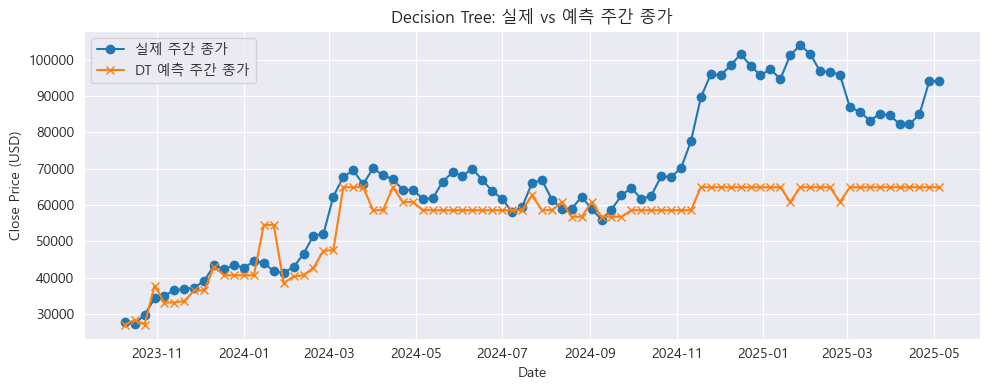

===== 회귀 모델 성능 (RMSE, R²) =====
            Model       RMSE     R2
Linear Regression  3826.4346 0.9656
    Decision Tree 17019.5984 0.3195

===== 분류 모델 성능 (F1 Score) =====
              Model  F1 Score
Logistic Regression    0.4375
      Decision Tree    0.4944

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.3902    0.4444    0.4156        36
           1     0.5238    0.4681    0.4944        47

    accuracy                         0.4578        83
   macro avg     0.4570    0.4563    0.4550        83
weighted avg     0.4659    0.4578    0.4602        83



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ─── 1) 데이터 로드 및 전처리 ─────────────────────────────────────────
df_chart = pd.read_csv(
    './chart/BINANCE_BTCUSDT_daily_UTC.csv',
    parse_dates=['date']
)
df_chart.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['OnchainValue'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])

df_chain_daily = (
    df_chain
    .groupby('Date', as_index=False)['OnchainValue']
    .sum()
)

df_merged = pd.merge(
    df_chart[['Date', 'Close']],
    df_chain_daily[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.set_index('Date', inplace=True)

# ─── 2) 주간 집계 (월요일 기준) ───────────────────────────────────────────
weekly = df_merged.resample('W-MON').agg({
    'Close': 'mean',
    'OnchainValue': 'sum'
}).dropna().reset_index()

# ─── 3) 특성/레이블 생성 ──────────────────────────────────────────────────
weekly['ClosePrev'] = weekly['Close'].shift(1)
weekly['OnchainPrev'] = weekly['OnchainValue'].shift(1)
data = weekly.dropna(subset=['ClosePrev', 'OnchainPrev']).copy()

X_reg = data[['OnchainPrev', 'ClosePrev']].values
y_reg = data['Close'].values

data['Direction'] = np.where(data['Close'] > data['ClosePrev'], 1, 0)
X_clf = data[['OnchainPrev', 'ClosePrev']].values
y_clf = data['Direction'].values

# ─── 4) 훈련/테스트 분리 ──────────────────────────────────────────────────
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.3, shuffle=False
)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf, test_size=0.3, shuffle=False
)

# ─── 5) 피처 스케일링 ─────────────────────────────────────────────────────
scaler_reg = StandardScaler()
Xr_train_scaled = scaler_reg.fit_transform(Xr_train)
Xr_test_scaled  = scaler_reg.transform(Xr_test)

scaler_clf = StandardScaler()
Xc_train_scaled = scaler_clf.fit_transform(Xc_train)
Xc_test_scaled  = scaler_clf.transform(Xc_test)

# ─── 6) 회귀 모델 정의 (2종) ─────────────────────────────────────────────
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# ─── 7) 분류 모델 정의 (2종) ─────────────────────────────────────────────
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# ─── 8) 회귀 학습 및 평가 ─────────────────────────────────────────────────
reg_results = []
for name, model in regressors.items():
    model.fit(Xr_train_scaled, yr_train)
    y_pred = model.predict(Xr_test_scaled)

    rmse = np.sqrt(mean_squared_error(yr_test, y_pred))
    r2 = r2_score(yr_test, y_pred)
    reg_results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

reg_results_df = pd.DataFrame(reg_results)

# ─── 9) 분류 학습 및 F1 스코어 평가 ───────────────────────────────────────
clf_results = []
for name, model in classifiers.items():
    model.fit(Xc_train_scaled, yc_train)
    y_pred = model.predict(Xc_test_scaled)

    f1 = f1_score(yc_test, y_pred, average='binary')
    clf_results.append({'Model': name, 'F1 Score': f1})

clf_results_df = pd.DataFrame(clf_results)

# ─── 10) 결과 시각화 예시: Decision Tree Regressor ───────────────────────
test_dates = data['Date'].iloc[-len(yr_test):]

dt_reg = regressors['Decision Tree']
y_pred_dt = dt_reg.predict(Xr_test_scaled)

plt.figure(figsize=(10, 4))
plt.plot(test_dates, yr_test, label='실제 주간 종가', marker='o')
plt.plot(test_dates, y_pred_dt, label='DT 예측 주간 종가', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Decision Tree: 실제 vs 예측 주간 종가')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ─── 11) 결과 출력 ───────────────────────────────────────────────────────
print("===== 회귀 모델 성능 (RMSE, R²) =====")
print(reg_results_df.to_string(index=False, float_format='{:.4f}'.format))

print("\n===== 분류 모델 성능 (F1 Score) =====")
print(clf_results_df.to_string(index=False, float_format='{:.4f}'.format))

# ─── 12) Decision Tree 분류 리포트 ────────────────────────────────────────
dt_clf = classifiers['Decision Tree']
y_pred_dt_clf = dt_clf.predict(Xc_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(yc_test, y_pred_dt_clf, digits=4))


In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib

# ─── 1) 데이터 로드 및 전처리: 일별 Chart & Onchain 병합 ────────────────────────────────
# 1-1) 차트 데이터 불러오기
df_chart = pd.read_csv(
    './chart/BINANCE_BTCUSDT_daily_UTC.csv',
    parse_dates=['date']
)
df_chart.rename(columns={'date': 'Date', 'close': 'Close'}, inplace=True)

# 1-2) 온체인 데이터 불러오기
df_chain = pd.read_csv('./onchain/usdt_onchain.csv', encoding='utf-8-sig')
df_chain['OnchainValue'] = (
    df_chain['Value (USD)']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)
df_chain['Date'] = pd.to_datetime(df_chain['Date'])

# 1-3) 일별 온체인 합계 계산
df_chain_daily = (
    df_chain
    .groupby('Date', as_index=False)['OnchainValue']
    .sum()
)

# 1-4) 일별 차트 & 온체인 병합
df_merged = pd.merge(
    df_chart[['Date', 'Close']],
    df_chain_daily[['Date', 'OnchainValue']],
    on='Date',
    how='inner'
)
df_merged.set_index('Date', inplace=True)

# ─── 2) 날짜 필터링: 2020-01-01 ~ 2025-04-30 ─────────────────────────────────────────────
df_daily = df_merged.copy()
df_daily = df_daily[(df_daily.index >= '2020-01-01') & (df_daily.index <= '2025-04-30')].copy()

# ─── 3) 주단위 그룹핑을 위한 WeekStart 컬럼 추가 (월요일 기준) ──────────────────────────────
df_daily['WeekStart'] = (
    df_daily.index.to_series()
             .dt.to_period('W-MON')
             .apply(lambda r: r.start_time)
)

# ─── 4) 주별로 그룹화 → 해당 주의 일간 데이터로 Linear Regression 학습 → 주별 R² 계산 ─────────
weekly_r2 = []
for week_start, group in df_daily.groupby('WeekStart'):
    if len(group) < 2:
        r2_value = np.nan
    else:
        X = group[['OnchainValue']].values  # (n_days, 1)
        y = group['Close'].values           # (n_days,)
        lr = LinearRegression()
        lr.fit(X, y)
        r2_value = lr.score(X, y)
    weekly_r2.append({'WeekStart': week_start, 'R2': r2_value})

r2_df = pd.DataFrame(weekly_r2)

# ─── 5) 월별 평균 R² 계산 ────────────────────────────────────────────────────────────────
# YearMonth 컬럼(예: '2020-06') 추가
r2_df['YearMonth'] = r2_df['WeekStart'].dt.to_period('M').astype(str)

# 같은 달(YearMonth)끼리 묶어서 주별 R² 평균
monthly_r2_df = (
    r2_df
    .groupby('YearMonth', as_index=False)['R2']
    .mean()
)

# ─── 6) Year/Month 컬럼 추가 ────────────────────────────────────────────────────────────
monthly_r2_df['Year'] = monthly_r2_df['YearMonth'].str.split('-').str[0]
monthly_r2_df['Month'] = monthly_r2_df['YearMonth'].str.split('-').str[1]

# ─── 7) 연도별·월별 데이터 피벗 → 표 형태 생성 ───────────────────────────────────────────
table_df = monthly_r2_df.pivot(index='Year', columns='Month', values='R2')
table_df = table_df.reindex(columns=[f"{i:02d}" for i in range(1, 13)])

# ─── 8) 스타일 함수 정의 ──────────────────────────────────────────────────────────────
def color_gradient(val):
    # NaN은 흰색
    if pd.isna(val):
        return ''
    # R² 값 기준으로 그라데이션: 낮으면 연한, 높으면 진한 파란색
    cmap = matplotlib.cm.get_cmap('Blues')
    rgba = cmap(val)  # 0~1 사이에서 색 선택
    hex_color = matplotlib.colors.rgb2hex(rgba)
    return f'background-color: {hex_color}; color: #000000;'

# ─── 9) 스타일 적용 및 표시 ───────────────────────────────────────────────────────────
styled_table = table_df.style.applymap(color_gradient).set_caption("연도별 월별 R²")
display(styled_table)


C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\2975367944.py:97: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = table_df.style.applymap(color_gradient).set_caption("연도별 월별 R²")
C:\Users\kmj\AppData\Local\Temp\ipykernel_13388\2975367944.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('Blues')


Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020,nan,0.459574,0.115190,0.154833,0.475694,0.653136,0.127910,0.220429,0.162959,0.301634,0.183701,0.205920
2021,0.192104,0.246562,0.187597,0.259432,0.143529,0.201772,0.164169,0.161338,0.367802,0.362932,0.211230,0.396843
2022,0.216172,0.076420,0.164008,0.142513,0.285465,0.563756,0.252327,0.161221,0.071680,0.104812,0.160451,0.148119
2023,0.275395,0.248841,0.296642,0.258137,0.370109,0.241425,0.169372,0.163022,0.070873,0.148751,0.147454,0.337911
2024,0.160003,0.155744,0.154020,0.216313,0.478495,0.352272,0.311851,0.186348,0.120321,0.090974,0.085036,0.166920
2025,0.330591,0.238401,0.163756,0.436719,nan,nan,nan,nan,nan,nan,nan,nan


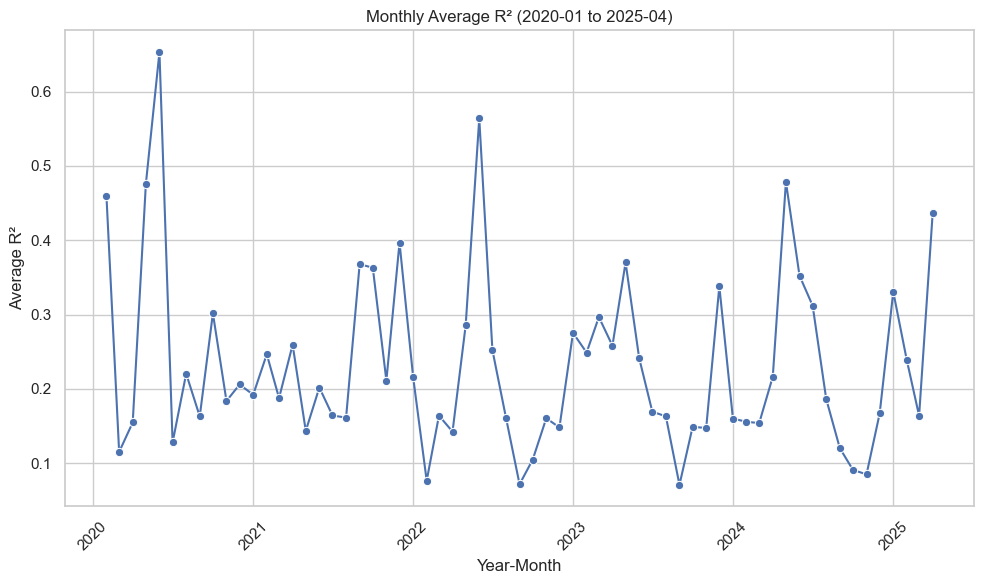

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV에서 불러오기
monthly_r2_df = pd.read_csv('./onchain/monthly_r2_2020-2025.csv')

# 문자열 형태의 YearMonth를 datetime으로 변환
monthly_r2_df['YearMonth'] = pd.to_datetime(monthly_r2_df['YearMonth'], format='%Y-%m')

# Seaborn 스타일 세팅 (선택 사항)
sns.set_theme(style="whitegrid")

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_r2_df,
    x='YearMonth',
    y='R2',
    marker='o'
)

plt.title("Monthly Average R² (2020-01 to 2025-04)")
plt.xlabel("Year-Month")
plt.ylabel("Average R²")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 실험 결과 | 커뮤니티, 차트, 온체인을 통한 분석표

<!-- # 실험 결과 | 커뮤니티, 차트, 온체인 동시 분석 -->

In [ ]:
# 커뮤니티 + 차트, 차트 + 온체인을 통해서 나온 월별 예측, 상승 하락, 상관계수를 정리하여서 표로 나타냈습니다